# TC-ADC-I: TEST-ADC-VAL 

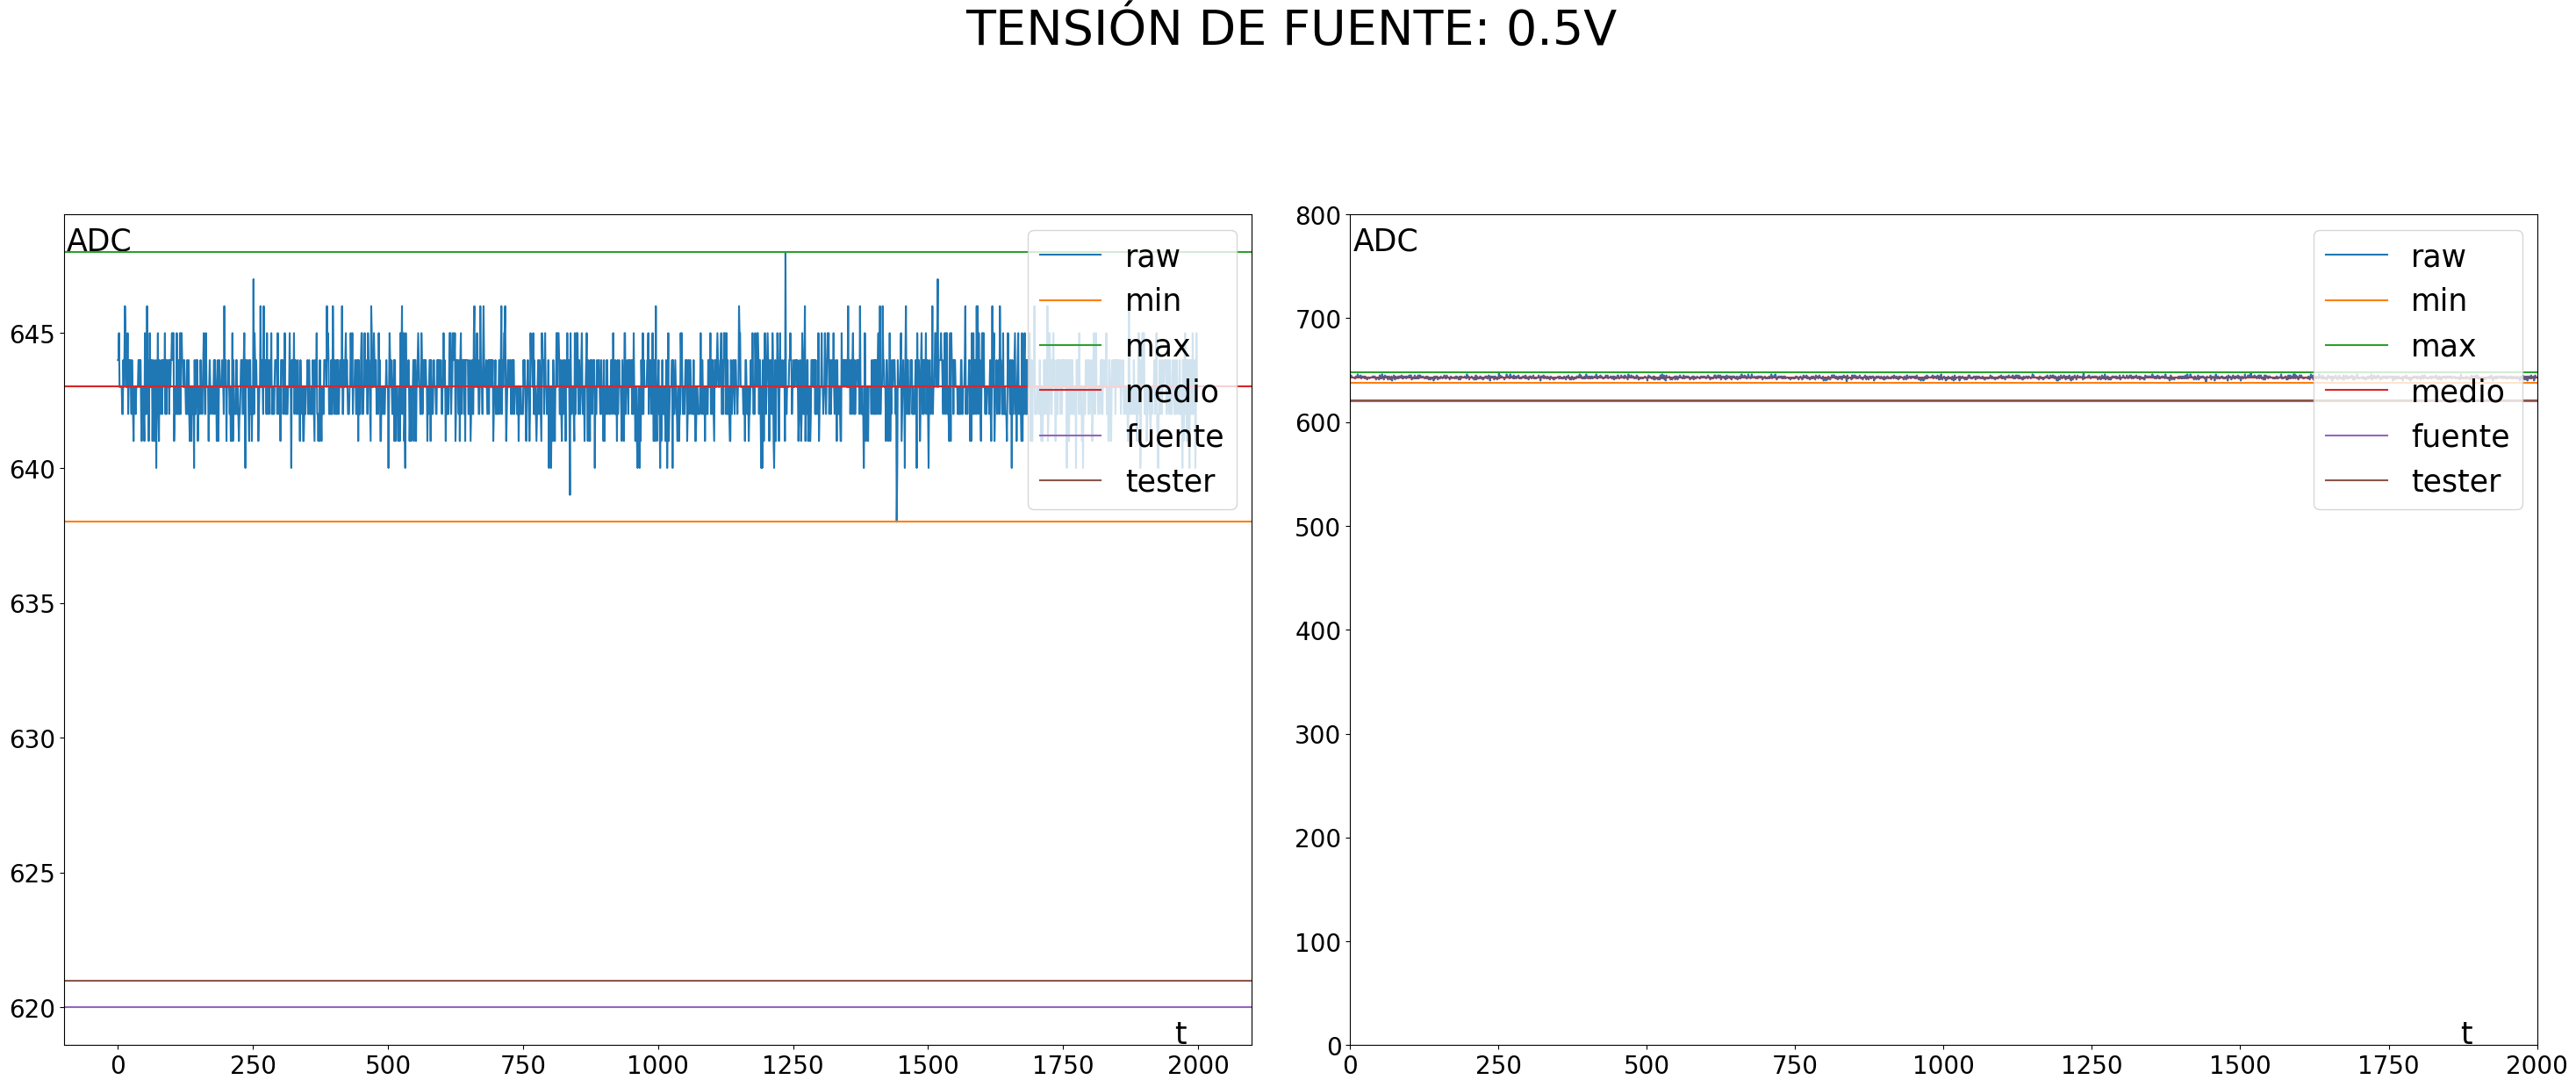

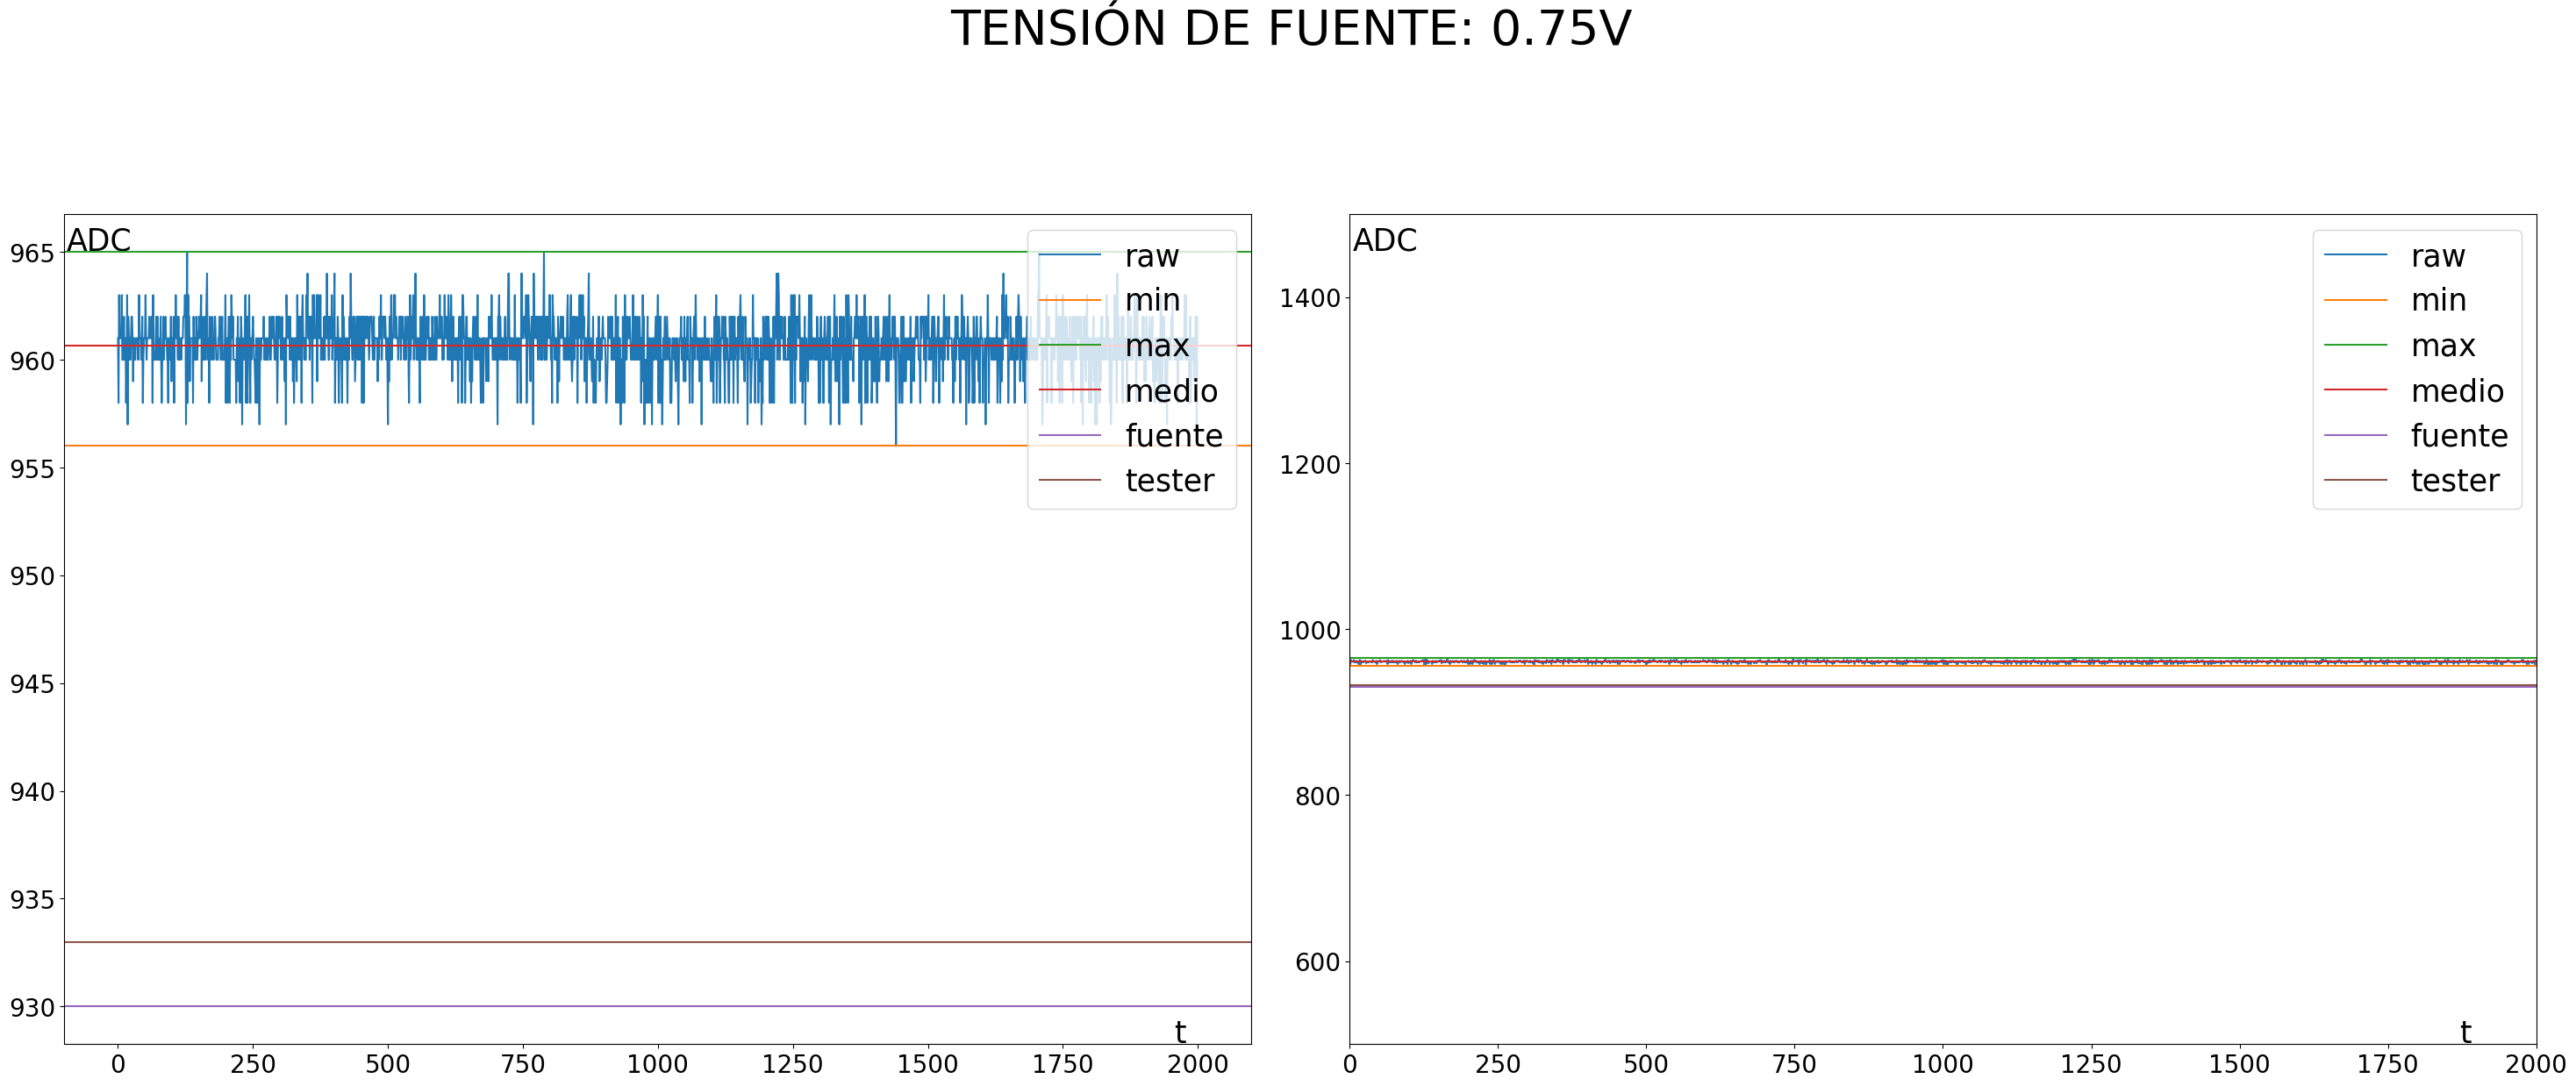

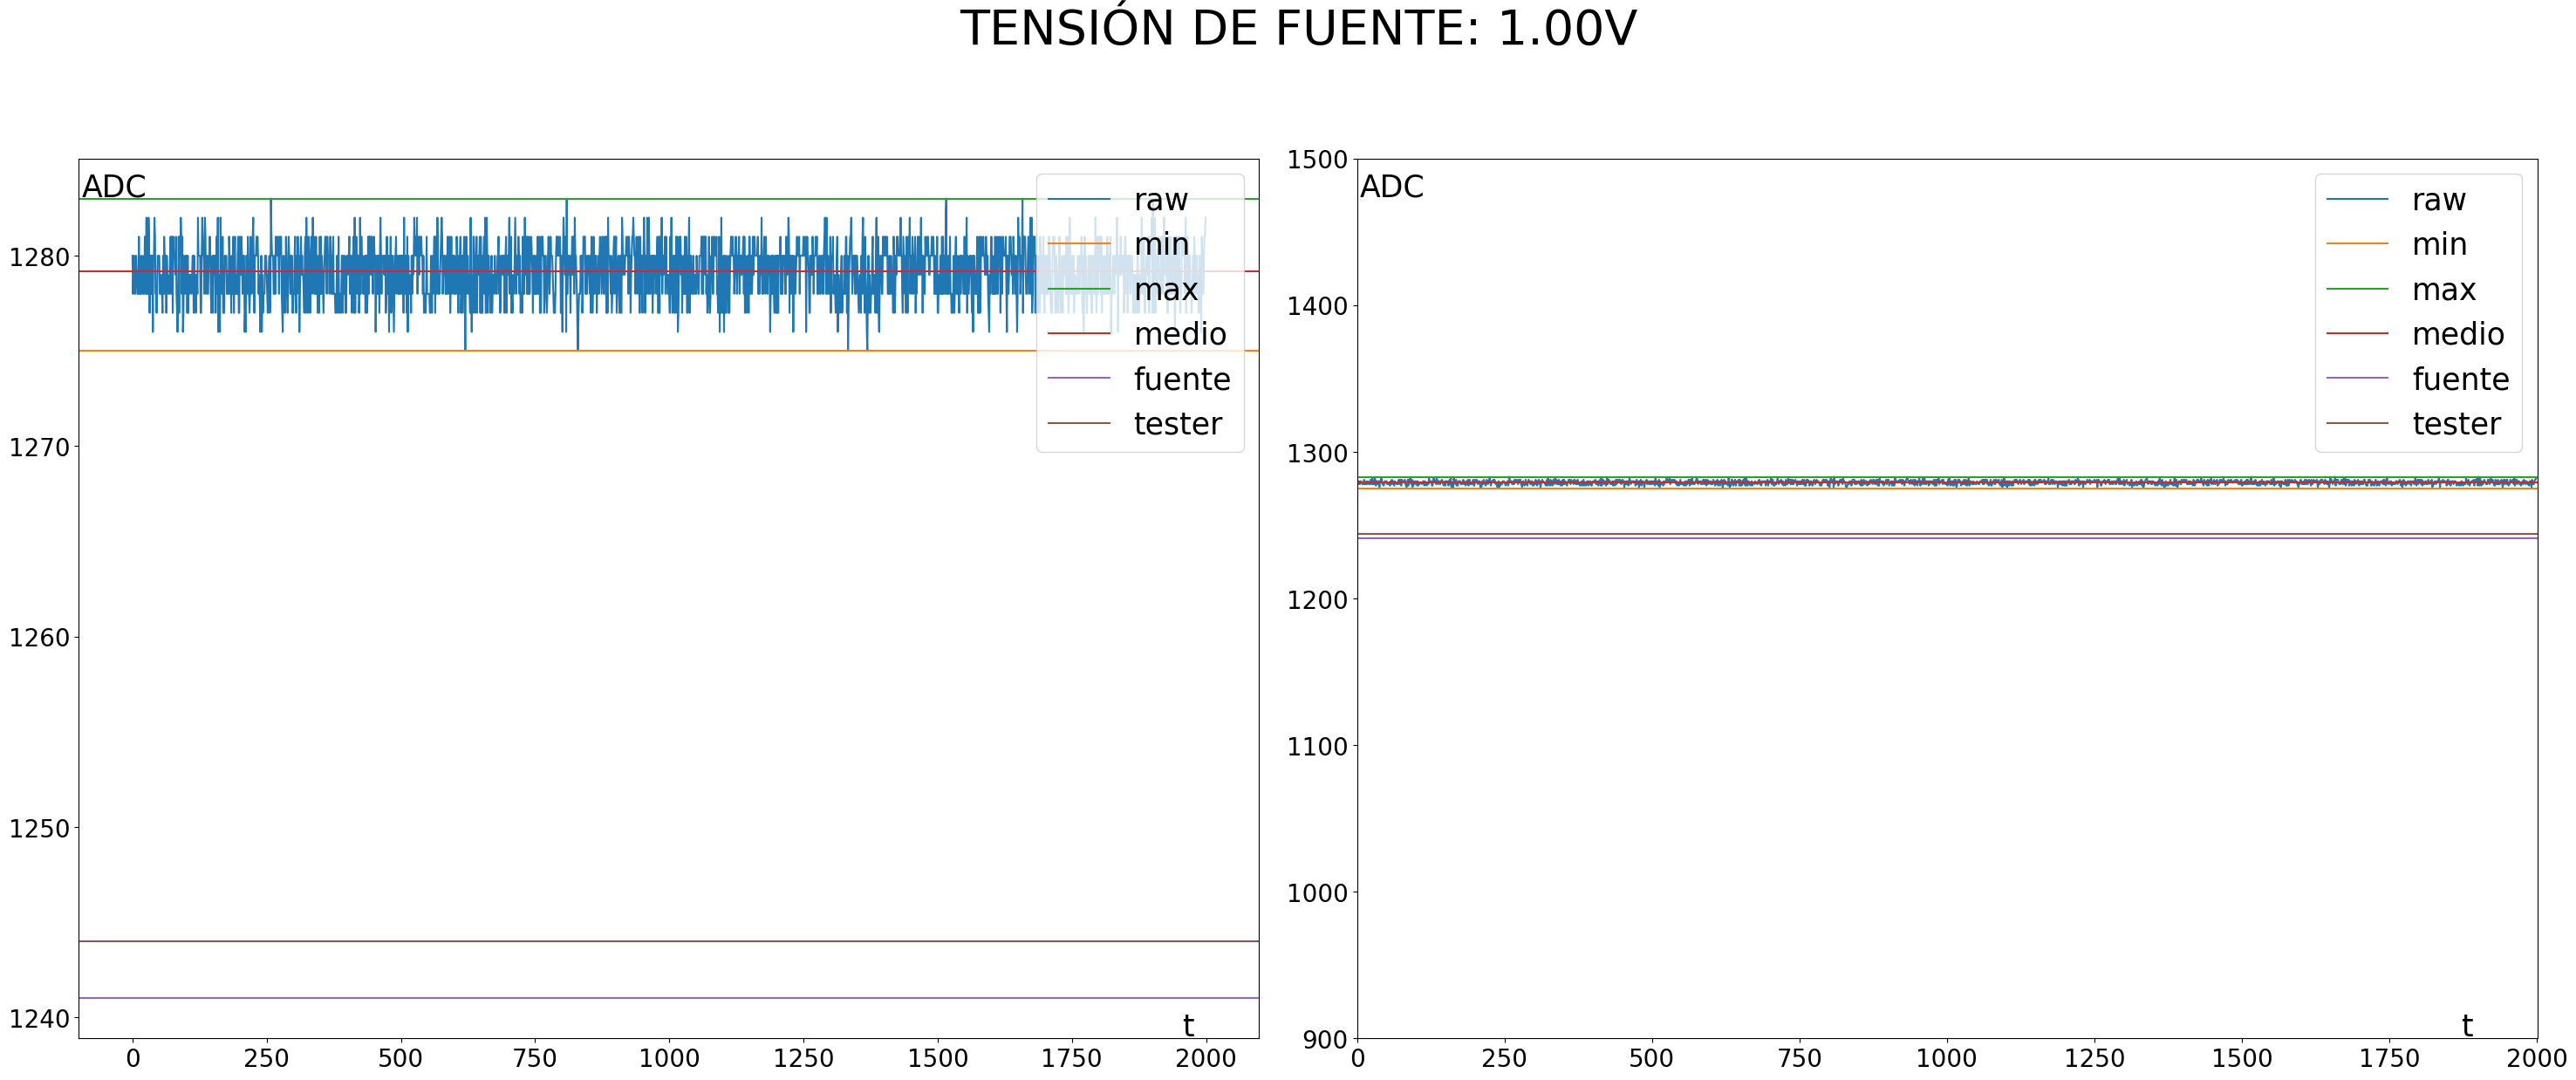

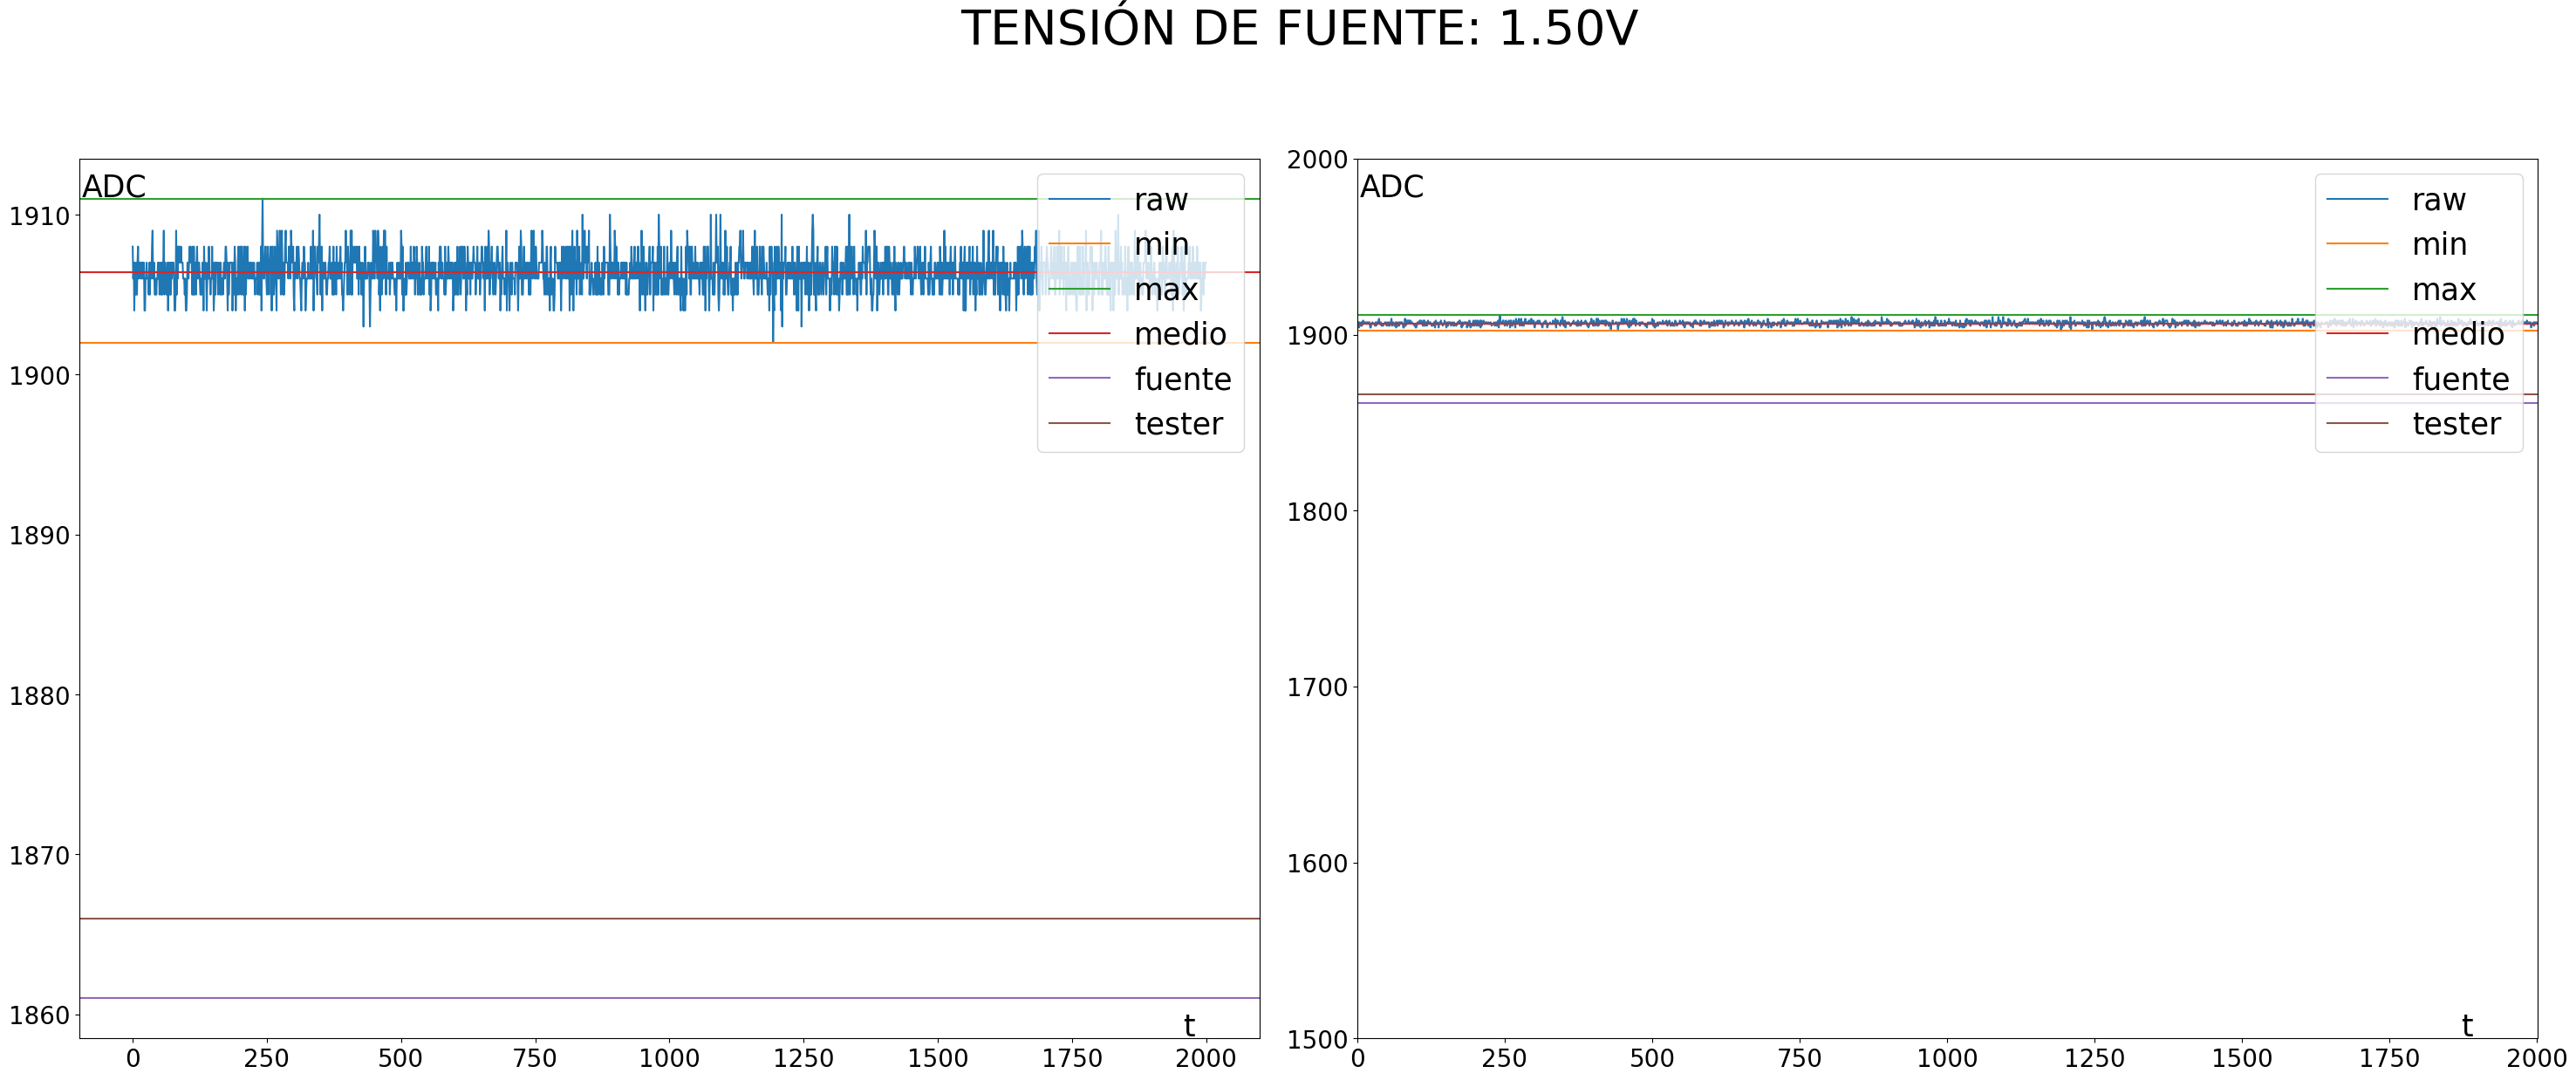

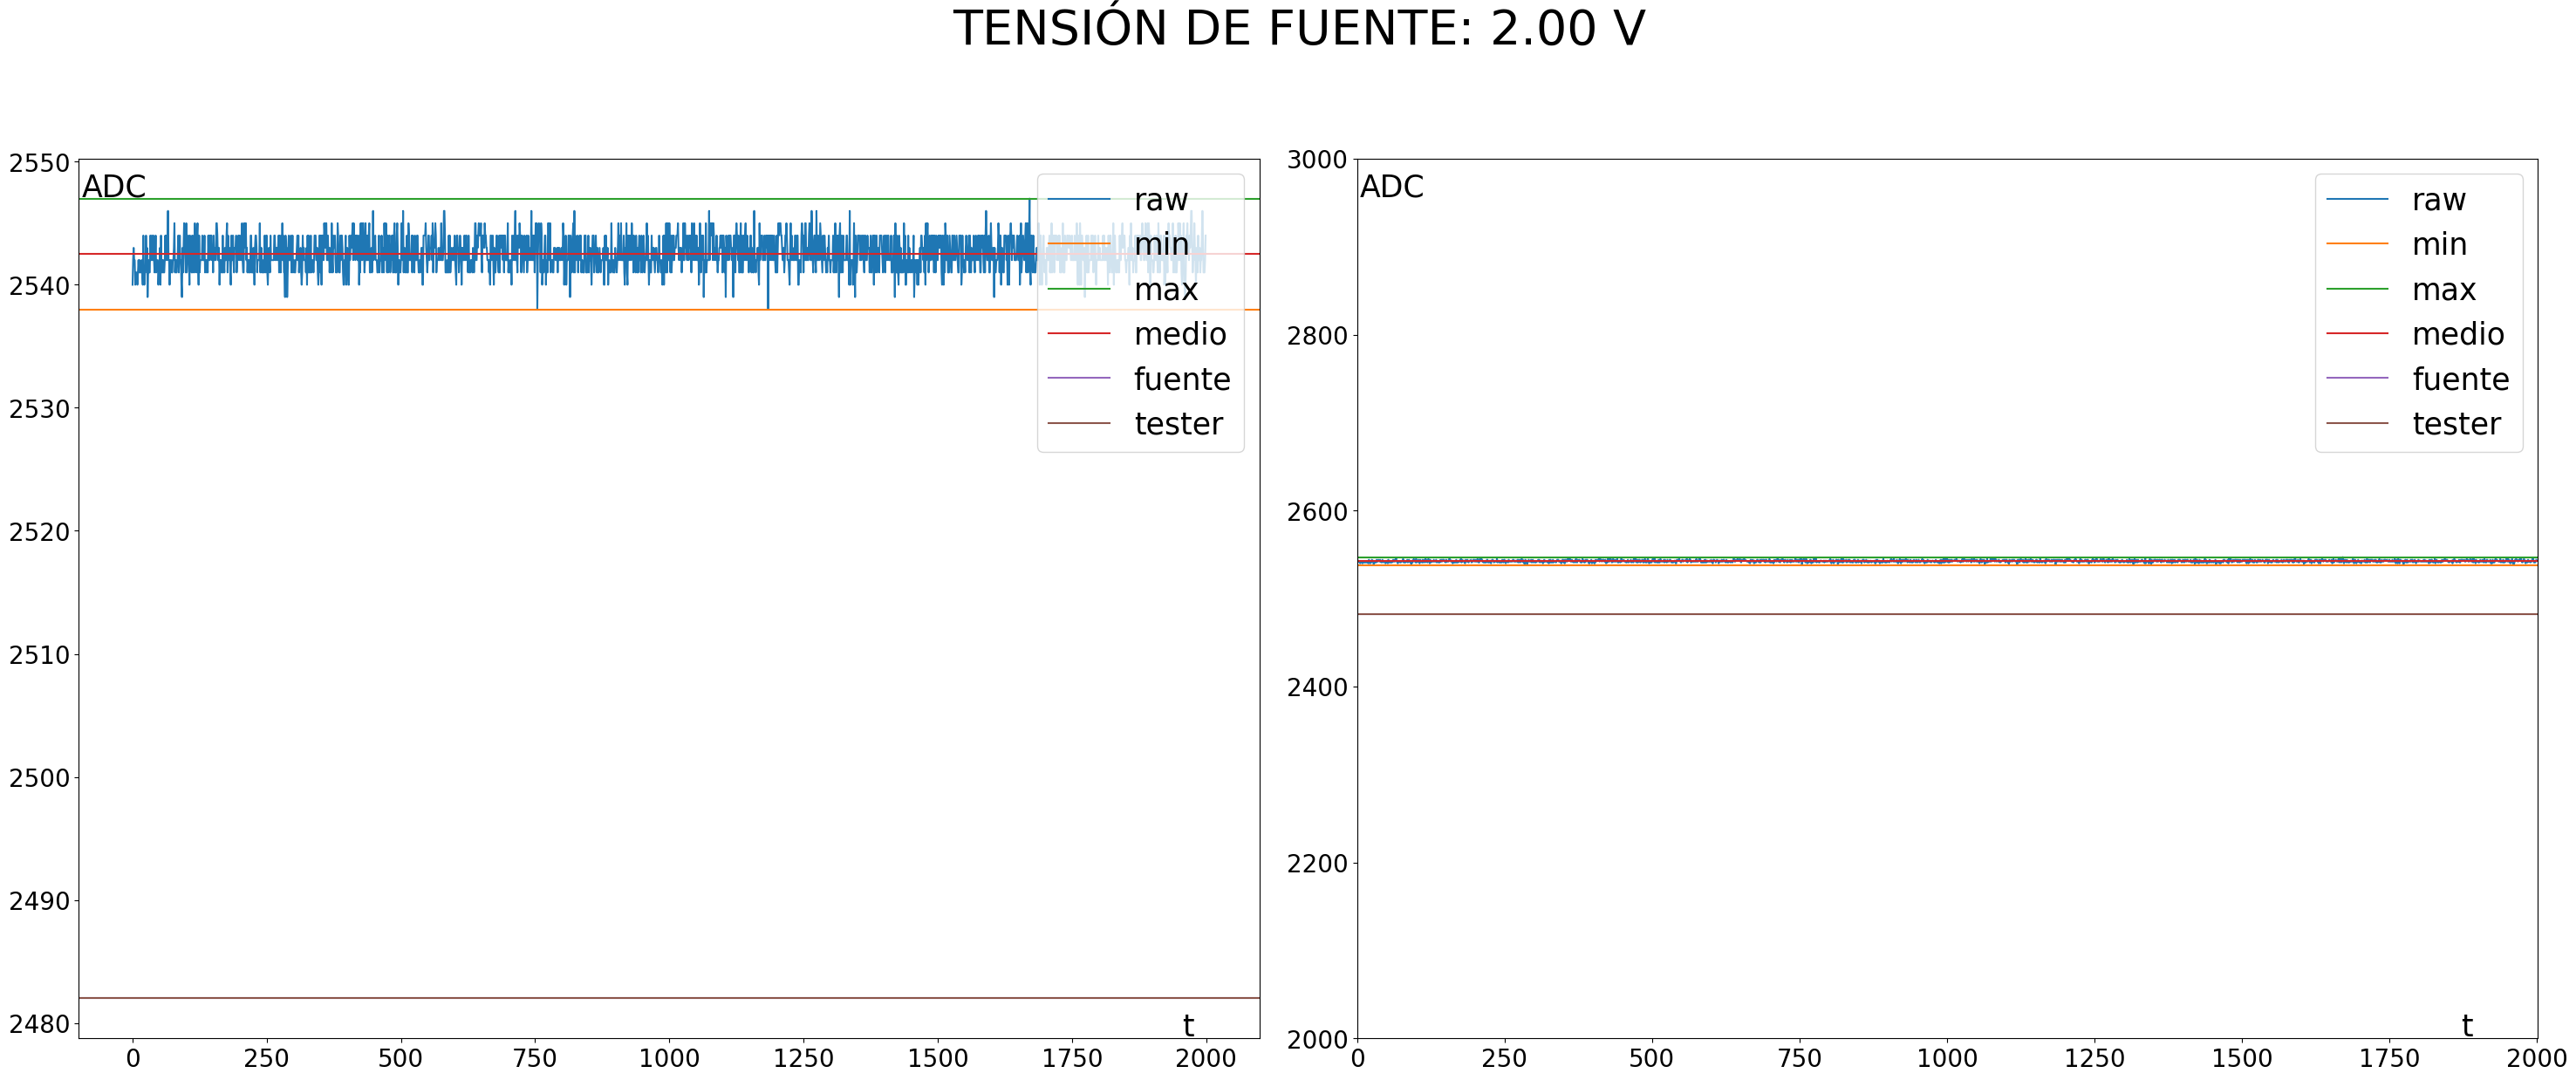

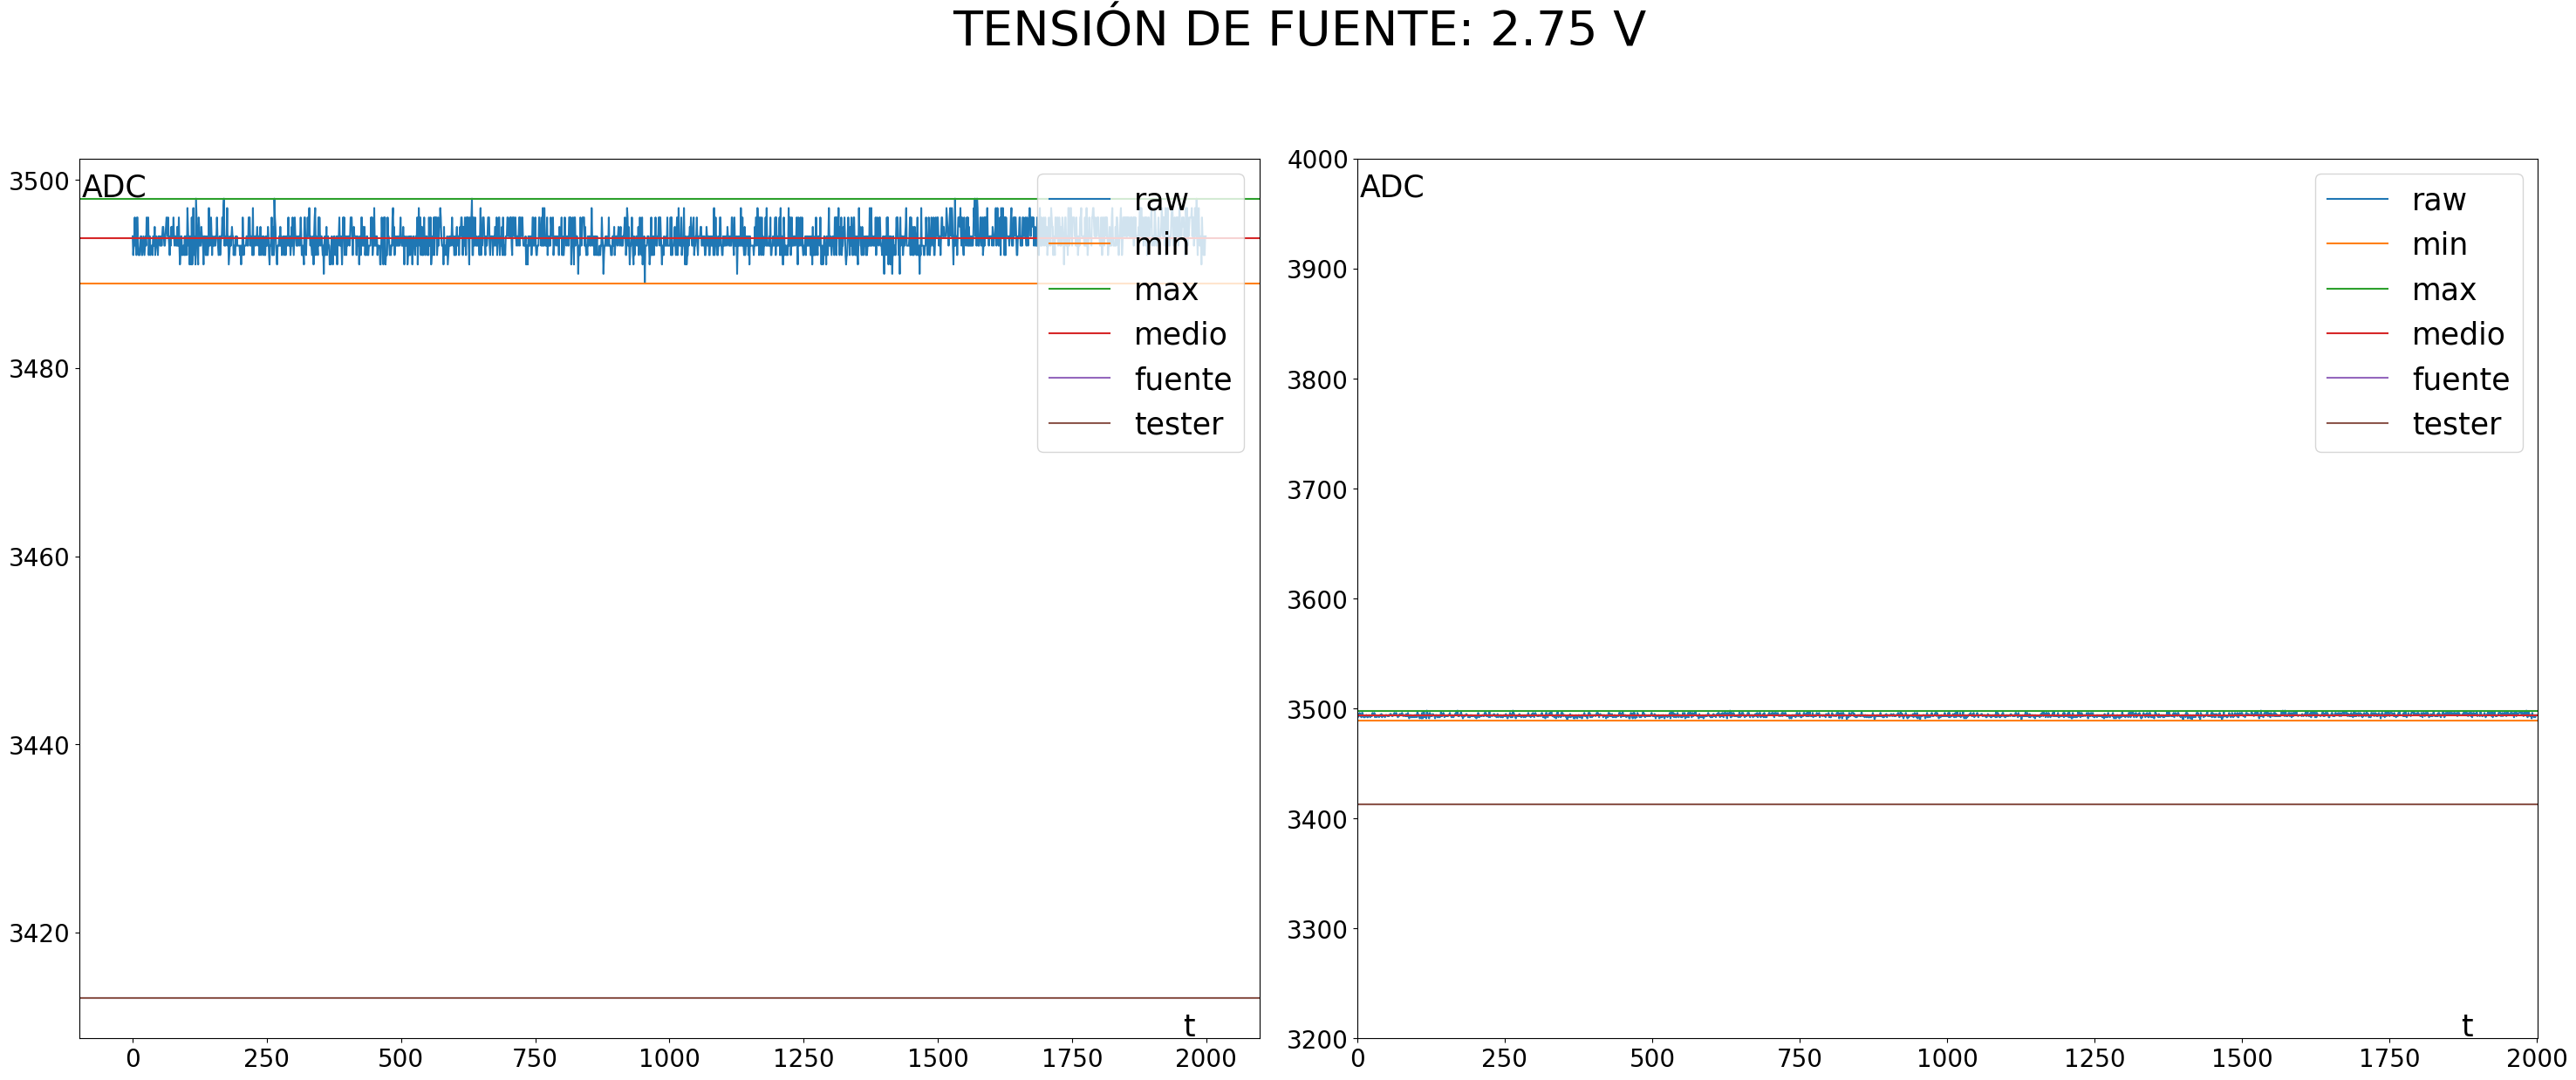

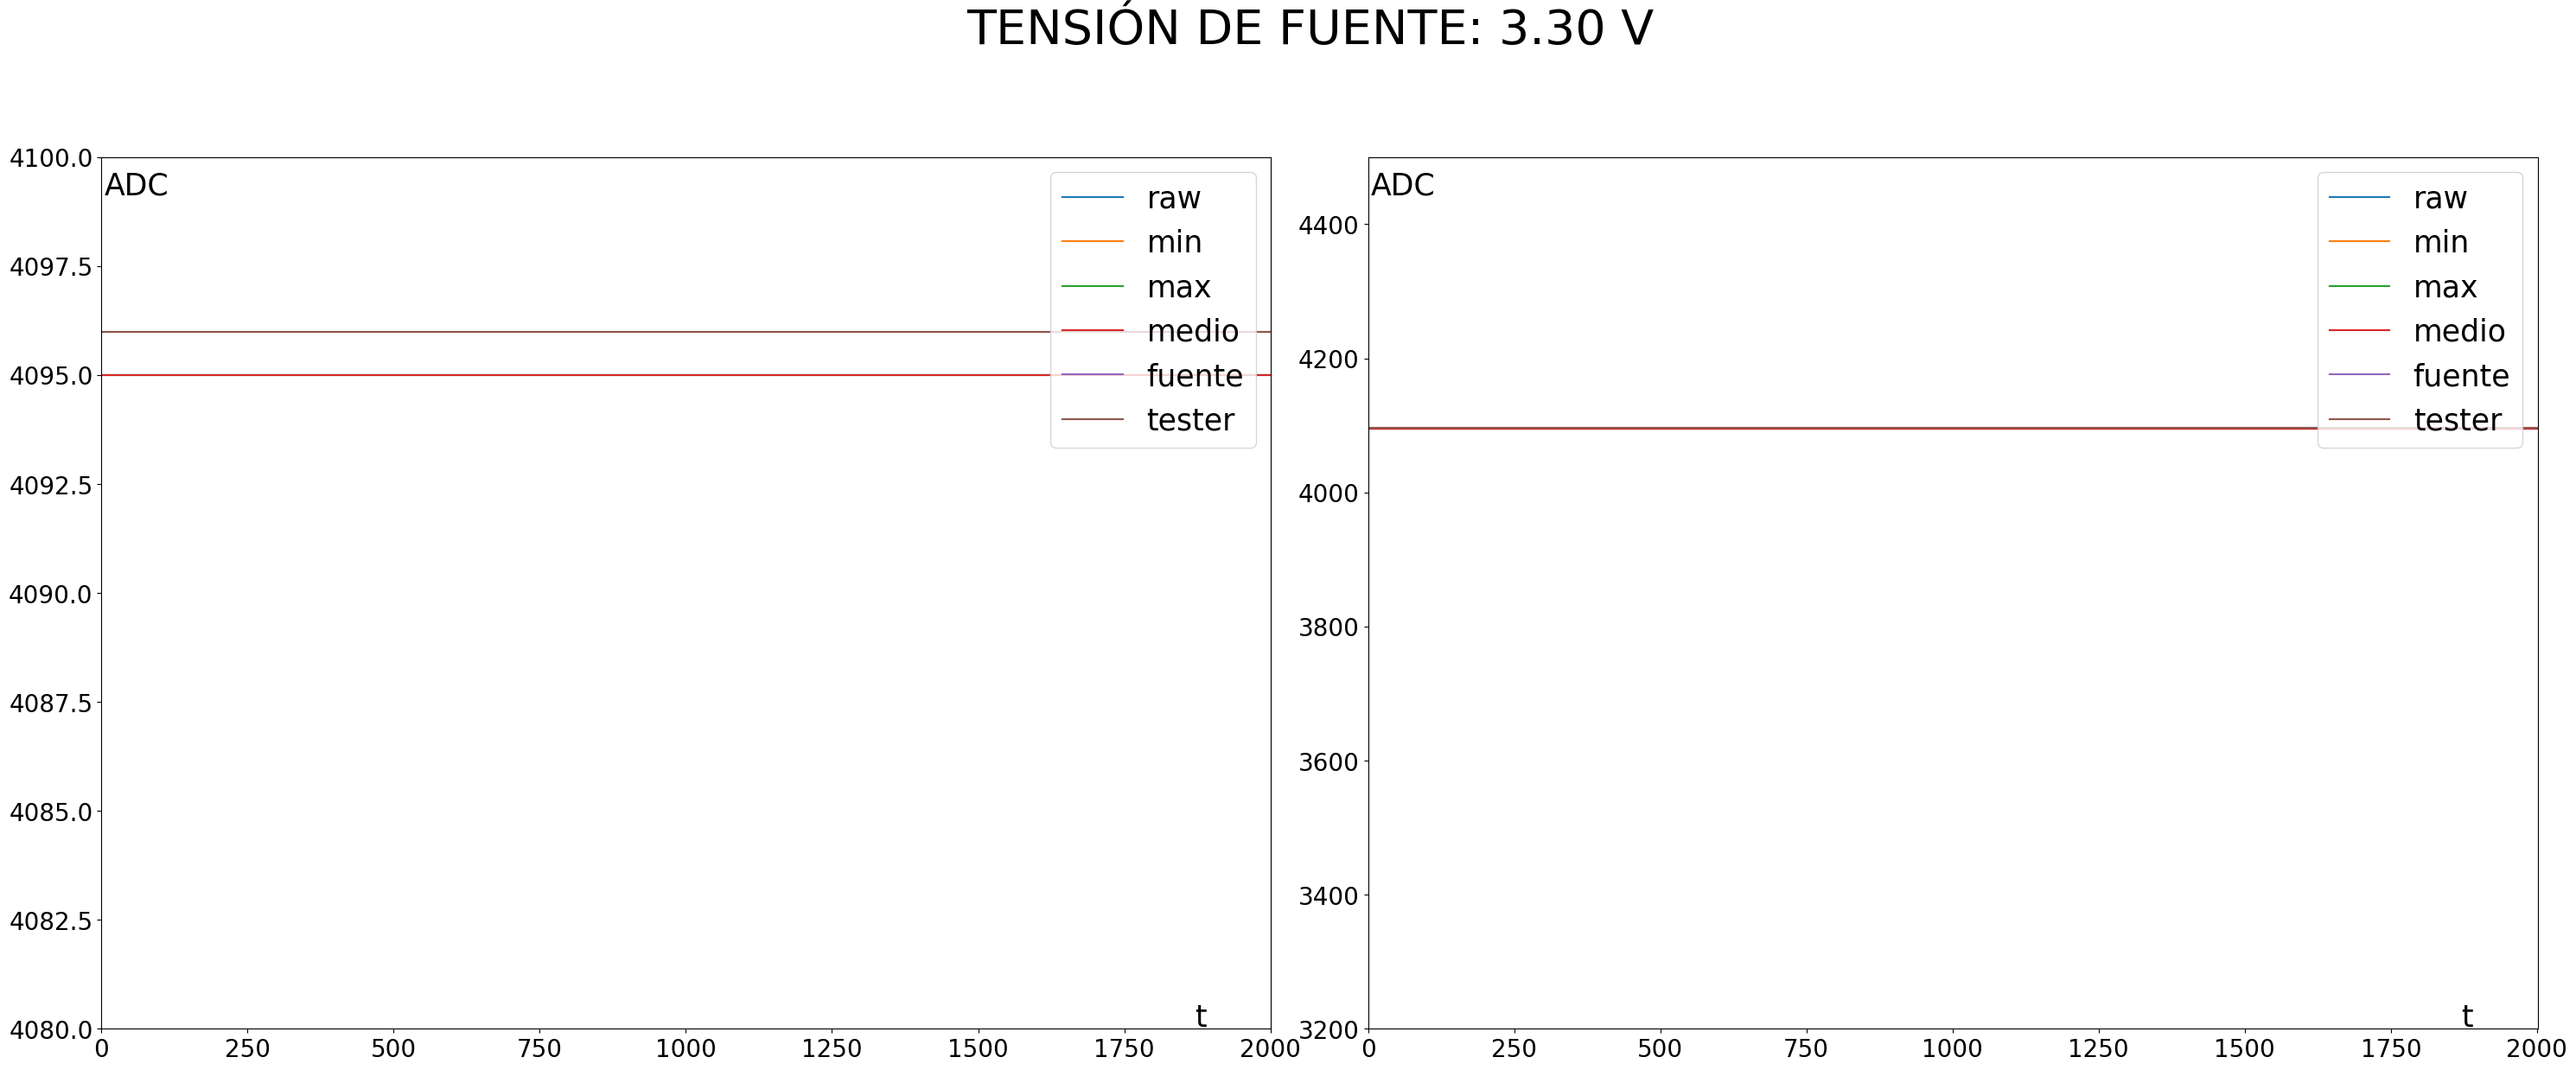

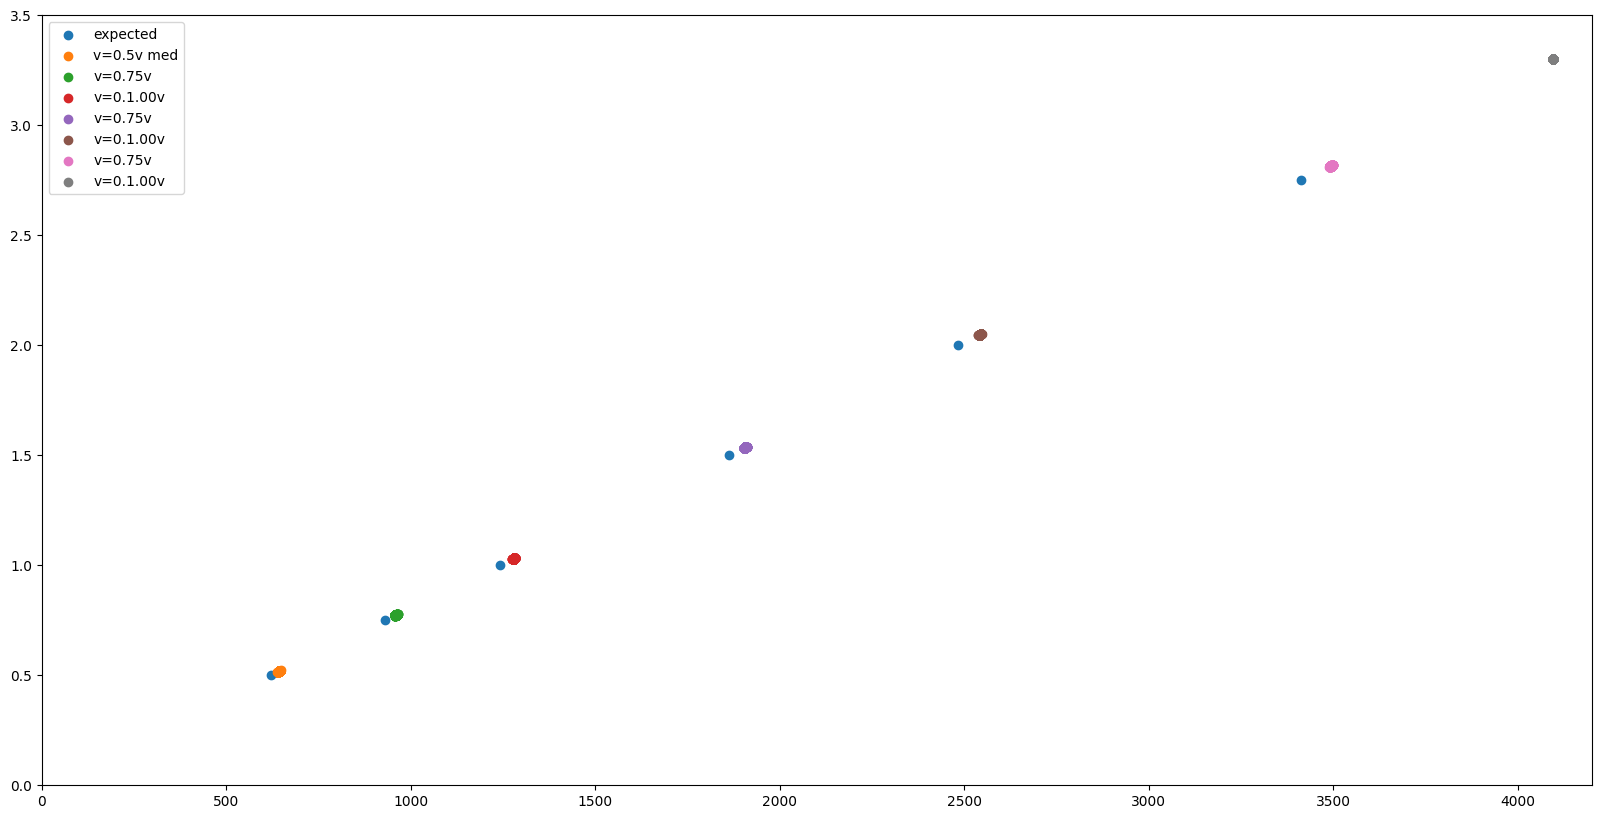

In [66]:
from IPython.display import Markdown as md
import matplotlib.pylab as plt
import numpy as np 
### 0.5v fuente - Tester 0.501v  
### 0.75 fuente - Tester 0.752v 
### 1.0  fuente - Tester 1.003v 
### 1.5  fuente - Tester 1.504v 
### 2.0  fuente - Tester 2.000v
### 2.75 fuente - Tester 2.750v
### 3.3. fuente - Tester 3.300v
## PARAMETERS OF ANALISIS ADC TEST REPORT 
path_file = '../../../results/TC-I-ADC/'
list_files_tcI=['TC-I-ADC-0.5.txt','TC-I-ADC-0.75.txt','TC-I-ADC-1.00.txt','TC-I-ADC-1.50.txt','TC-I-ADC-2.00.txt','TC-I-ADC-2.75.txt', 'TC-I-ADC-3.30.txt']
voltage_tester = [0.501,0.752,1.003,1.504,2.000,2.7500,3.300] 
voltage_source = [0.5,0.75,1.0,1.5,2.0,2.75,3.3]



NBITS = 12 
MAX_VALUE =4096 #2**12 
SOURCE_ADC_VOLTAGE = 3.30 #MEASURE OF GND
measure_data = np.zeros((2000,len(list_files_tcI)),dtype=int)
measure_data_hex = np.zeros((2000,len(list_files_tcI)),dtype=int)
v_compute_raw_adc= np.zeros((2000,len(list_files_tcI)))

### Values of compute of script 
##  Expected values compute 
## position indicate a file using a list_files_tcI
ADC_voltage_expected_tester = []
ADC_voltage_expected_source = []
ADC_mean_samples = []
ADC_max_sample = []
ADC_min_sample = [] 
n_samples_adc = np.arange(0,2000,1.0,dtype=float) # eje x para gráficas ADC 


for i in range(0,len(voltage_tester)):
    ADC_voltage_expected_tester.append(int( (MAX_VALUE/SOURCE_ADC_VOLTAGE)*voltage_tester[i]))
    ADC_voltage_expected_source.append(int(( (MAX_VALUE/SOURCE_ADC_VOLTAGE)*voltage_source[i])))
    

### PROCESSING FILES FOR EXTRACT DATA !     
i = 0 
for file in list_files_tcI:    
    d0,d1,d2 = np.genfromtxt(path_file+file, delimiter=',', dtype=None, encoding=None,unpack=True)
    d1 =np.array([int(x, 16) for x in d1])
    d2 =d2.astype(int) 
    measure_data[:,i] = d2 
    measure_data_hex[:,i] = d1 
    ADC_mean_samples.append(np.mean(d2))
    ADC_max_sample.append(np.amax(d2))
    ADC_min_sample.append(np.amin(d2))
    i = i +1 

for i in range(0,len(list_files_tcI)): 
    v_compute_raw_adc[:,i] = measure_data[:,i]*(SOURCE_ADC_VOLTAGE/MAX_VALUE)







### FIGURE CREATE AND DRAWING DATA 
######################################### SOURCE OF 0.5V  ###############################################################

fig05, ax05 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig05.suptitle('TENSIÓN DE FUENTE: 0.5V\n',fontsize = 40)
fig05.tight_layout(pad=5.0)
l1=ax05[0].plot(n_samples_adc, measure_data[:,0],label='raw',color='#1f77b4')
l2=ax05[0].axhline(y=ADC_min_sample[0],label='min',color= '#ff7f0e')
l3=ax05[0].axhline(y=ADC_max_sample[0],label='max',color='#2ca02c')
l4=ax05[0].axhline(y=ADC_mean_samples[0],label='medio',color ='#d62728')
l5=ax05[0].axhline(y=ADC_voltage_expected_source[0],label='fuente',color = '#9467bd')
l6= ax05[0].axhline(y=ADC_voltage_expected_tester[0],label='tester',color= '#8c564b')
ax05[0].legend(loc='upper right',fontsize=25)
ax05[0].set_xlabel('t',fontsize = 25) 
ax05[0].set_ylabel('ADC', rotation = 0,fontsize =25) 
ax05[0].tick_params(axis='both', which='major', labelsize=20)
ax05[0].xaxis.set_label_coords(0.94,0.03)
ax05[0].yaxis.set_label_coords(0.03,0.95)
l1=ax05[1].plot(n_samples_adc, measure_data[:,0],label='raw',color='#1f77b4')
l2=ax05[1].axhline(y=ADC_min_sample[0],label='min',color= '#ff7f0e')
l3=ax05[1].axhline(y=ADC_max_sample[0],label='max',color='#2ca02c')
l4=ax05[1].axhline(y=ADC_mean_samples[0],label='medio',color='#d62728')
l5=ax05[1].axhline(y=ADC_voltage_expected_source[0],label='fuente',color = '#9467bd')
l6= ax05[1].axhline(y=ADC_voltage_expected_tester[0],label='tester',color = '#8c564b')
ax05[1].legend(loc='upper right',fontsize=25)                         
ax05[1].tick_params(axis='both', which='major',labelsize=20) 
ax05[1].set_xlabel('t',fontsize = 25) 
ax05[1].set_ylabel('ADC', rotation = 0,fontsize = 25 ) 
ax05[1].set_xlim([0,2001]) 
ax05[1].set_ylim([0,800]) 
ax05[1].xaxis.set_label_coords(0.94,0.03)
ax05[1].yaxis.set_label_coords(0.03,0.95)
fig05.savefig(path_file+'TC-I-ADC-0.5.jpg') 
######################################### END SOURCE OF 0.5V  ###############################################################

#########################################  SOURCE OF 0.75V  ###############################################################
fig075, ax075 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig075.suptitle('TENSIÓN DE FUENTE: 0.75V\n',fontsize = 40)
fig075.tight_layout(pad=5.0)
l1=ax075[0].plot(n_samples_adc, measure_data[:,1],label='raw',color='#1f77b4')
l2=ax075[0].axhline(y=ADC_min_sample[1],label='min',color= '#ff7f0e')
l3=ax075[0].axhline(y=ADC_max_sample[1],label='max',color='#2ca02c')
l4=ax075[0].axhline(y=ADC_mean_samples[1],label='medio',color ='#d62728')
l5=ax075[0].axhline(y=ADC_voltage_expected_source[1],label='fuente',color = '#9467bd')
l6= ax075[0].axhline(y=ADC_voltage_expected_tester[1],label='tester',color= '#8c564b')
ax075[0].legend(loc='upper right',fontsize=25)
ax075[0].set_xlabel('t',fontsize = 25) 
ax075[0].set_ylabel('ADC', rotation = 0,fontsize =25) 
ax075[0].tick_params(axis='both', which='major', labelsize=20)
ax075[0].xaxis.set_label_coords(0.94,0.03)
ax075[0].yaxis.set_label_coords(0.03,0.95)
l1=ax075[1].plot(n_samples_adc, measure_data[:,1],label='raw',color='#1f77b4')
l2=ax075[1].axhline(y=ADC_min_sample[1],label='min',color= '#ff7f0e')
l3=ax075[1].axhline(y=ADC_max_sample[1],label='max',color='#2ca02c')
l4=ax075[1].axhline(y=ADC_mean_samples[1],label='medio',color='#d62728')
l5=ax075[1].axhline(y=ADC_voltage_expected_source[1],label='fuente',color = '#9467bd')
l6= ax075[1].axhline(y=ADC_voltage_expected_tester[1],label='tester',color = '#8c564b')
ax075[1].legend(loc='upper right',fontsize=25)                         
ax075[1].tick_params(axis='both', which='major',labelsize=20) 
ax075[1].set_xlabel('t',fontsize = 25) 
ax075[1].set_ylabel('ADC', rotation = 0,fontsize = 25 ) 
ax075[1].set_xlim([0,2001]) 
ax075[1].set_ylim([500,1500]) 
ax075[1].xaxis.set_label_coords(0.94,0.03)
ax075[1].yaxis.set_label_coords(0.03,0.95)
fig075.savefig(path_file+'TC-I-ADC-0.75.png',bbox_inches="tight") 
######################################### END SOURCE OF 0.75V  ###############################################################



#########################################  SOURCE OF 1.00V  ###############################################################
fig100, ax100 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig100.suptitle('TENSIÓN DE FUENTE: 1.00V',fontsize = 40)
fig100.tight_layout(pad=5.0)
l1=ax100[0].plot(n_samples_adc, measure_data[:,2],label='raw',color='#1f77b4')
l2=ax100[0].axhline(y=ADC_min_sample[2],label='min',color= '#ff7f0e')
l3=ax100[0].axhline(y=ADC_max_sample[2],label='max',color='#2ca02c')
l4=ax100[0].axhline(y=ADC_mean_samples[2],label='medio',color ='#d62728')
l5=ax100[0].axhline(y=ADC_voltage_expected_source[2],label='fuente',color = '#9467bd')
l6= ax100[0].axhline(y=ADC_voltage_expected_tester[2],label='tester',color= '#8c564b')
ax100[0].legend(loc='upper right',fontsize=25)
ax100[0].set_xlabel('t',fontsize = 25) 
ax100[0].set_ylabel('ADC', rotation = 0,fontsize =25) 
ax100[0].tick_params(axis='both', which='major', labelsize=20)
ax100[0].xaxis.set_label_coords(0.94,0.03)
ax100[0].yaxis.set_label_coords(0.03,0.95)
l1=ax100[1].plot(n_samples_adc, measure_data[:,2],label='raw',color='#1f77b4')
l2=ax100[1].axhline(y=ADC_min_sample[2],label='min',color= '#ff7f0e')
l3=ax100[1].axhline(y=ADC_max_sample[2],label='max',color='#2ca02c')
l4=ax100[1].axhline(y=ADC_mean_samples[2],label='medio',color='#d62728')
l5=ax100[1].axhline(y=ADC_voltage_expected_source[2],label='fuente',color = '#9467bd')
l6= ax100[1].axhline(y=ADC_voltage_expected_tester[2],label='tester',color = '#8c564b')
ax100[1].legend(loc='upper right',fontsize=25)                         
ax100[1].tick_params(axis='both', which='major',labelsize=20) 
ax100[1].set_xlabel('t',fontsize = 25) 
ax100[1].set_ylabel('ADC', rotation = 0,fontsize = 25 ) 
ax100[1].set_xlim([0,2001]) 
ax100[1].set_ylim([900,1500]) 
ax100[1].xaxis.set_label_coords(0.94,0.03)
ax100[1].yaxis.set_label_coords(0.03,0.95)
fig100.savefig(path_file+'TC-I-ADC-100.png',bbox_inches="tight") 
######################################### END SOURCE OF 1.00V  ###############################################################

######################################### SOURCE OF 1.50V  ###############################################################
fig150, ax150 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig150.suptitle('TENSIÓN DE FUENTE: 1.50V',fontsize = 40)
fig150.tight_layout(pad=5.0)
l1=ax150[0].plot(n_samples_adc, measure_data[:,3],label='raw',color='#1f77b4')
l2=ax150[0].axhline(y=ADC_min_sample[3],label='min',color= '#ff7f0e')
l3=ax150[0].axhline(y=ADC_max_sample[3],label='max',color='#2ca02c')
l4=ax150[0].axhline(y=ADC_mean_samples[3],label='medio',color ='#d62728')
l5=ax150[0].axhline(y=ADC_voltage_expected_source[3],label='fuente',color = '#9467bd')
l6= ax150[0].axhline(y=ADC_voltage_expected_tester[3],label='tester',color= '#8c564b')
ax150[0].legend(loc='upper right',fontsize=25)
ax150[0].set_xlabel('t',fontsize = 25) 
ax150[0].set_ylabel('ADC', rotation = 0,fontsize =25) 
ax150[0].tick_params(axis='both', which='major', labelsize=20)
ax150[0].xaxis.set_label_coords(0.94,0.03)
ax150[0].yaxis.set_label_coords(0.03,0.95)
l1=ax150[1].plot(n_samples_adc, measure_data[:,3],label='raw',color='#1f77b4')
l2=ax150[1].axhline(y=ADC_min_sample[3],label='min',color= '#ff7f0e')
l3=ax150[1].axhline(y=ADC_max_sample[3],label='max',color='#2ca02c')
l4=ax150[1].axhline(y=ADC_mean_samples[3],label='medio',color='#d62728')
l5=ax150[1].axhline(y=ADC_voltage_expected_source[3],label='fuente',color = '#9467bd')
l6= ax150[1].axhline(y=ADC_voltage_expected_tester[3],label='tester',color = '#8c564b')
ax150[1].legend(loc='upper right',fontsize=25)                         
ax150[1].tick_params(axis='both', which='major',labelsize=20) 
ax150[1].set_xlabel('t',fontsize = 25) 
ax150[1].set_ylabel('ADC', rotation = 0,fontsize = 25 ) 
ax150[1].set_xlim([0,2001]) 
ax150[1].set_ylim([1500,2000]) 
ax150[1].xaxis.set_label_coords(0.94,0.03)
ax150[1].yaxis.set_label_coords(0.03,0.95)
fig150.savefig(path_file+'TC-I-ADC-1.50.png',bbox_inches="tight") 
######################################### END SOURCE OF 1.50V  ###############################################################

######################################### SOURCE OF 2.00V  ###############################################################
#index 4 
fig200, ax200 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig200.suptitle('TENSIÓN DE FUENTE: 2.00 V',fontsize = 40)
fig200.tight_layout(pad=5.0)
l1=ax200[0].plot(n_samples_adc, measure_data[:,4],label='raw',color='#1f77b4')
l2=ax200[0].axhline(y=ADC_min_sample[4],label='min',color= '#ff7f0e')
l3=ax200[0].axhline(y=ADC_max_sample[4],label='max',color='#2ca02c')
l4=ax200[0].axhline(y=ADC_mean_samples[4],label='medio',color ='#d62728')
l5=ax200[0].axhline(y=ADC_voltage_expected_source[4],label='fuente',color = '#9467bd')
l6= ax200[0].axhline(y=ADC_voltage_expected_tester[4],label='tester',color= '#8c564b')
ax200[0].legend(loc='upper right',fontsize=25)
ax200[0].set_xlabel('t',fontsize = 25) 
ax200[0].set_ylabel('ADC', rotation = 0,fontsize =25) 
ax200[0].tick_params(axis='both', which='major', labelsize=20)
ax200[0].xaxis.set_label_coords(0.94,0.03)
ax200[0].yaxis.set_label_coords(0.03,0.95)
l1=ax200[1].plot(n_samples_adc, measure_data[:,4],label='raw',color='#1f77b4')
l2=ax200[1].axhline(y=ADC_min_sample[4],label='min',color= '#ff7f0e')
l3=ax200[1].axhline(y=ADC_max_sample[4],label='max',color='#2ca02c')
l4=ax200[1].axhline(y=ADC_mean_samples[4],label='medio',color='#d62728')
l5=ax200[1].axhline(y=ADC_voltage_expected_source[4],label='fuente',color = '#9467bd')
l6= ax200[1].axhline(y=ADC_voltage_expected_tester[4],label='tester',color = '#8c564b')
ax200[1].legend(loc='upper right',fontsize=25)                         
ax200[1].tick_params(axis='both', which='major',labelsize=20) 
ax200[1].set_xlabel('t',fontsize = 25) 
ax200[1].set_ylabel('ADC', rotation = 0,fontsize = 25 ) 
ax200[1].set_xlim([0,2001]) 
ax200[1].set_ylim([2000,3000]) 
ax200[1].xaxis.set_label_coords(0.94,0.03)
ax200[1].yaxis.set_label_coords(0.03,0.95)
fig200.savefig(path_file+'TC-I-ADC-2.00.png',bbox_inches="tight") 

######################################### END SOURCE OF 2.00V  ###############################################################

######################################### SOURCE OF 2.75V  ###############################################################
#index 5
fig275, ax275 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig275.suptitle('TENSIÓN DE FUENTE: 2.75 V',fontsize = 40)
fig275.tight_layout(pad=5.0)
l1=ax275[0].plot(n_samples_adc, measure_data[:,5],label='raw',color='#1f77b4')
l2=ax275[0].axhline(y=ADC_min_sample[5],label='min',color= '#ff7f0e')
l3=ax275[0].axhline(y=ADC_max_sample[5],label='max',color='#2ca02c')
l4=ax275[0].axhline(y=ADC_mean_samples[5],label='medio',color ='#d62728')
l5=ax275[0].axhline(y=ADC_voltage_expected_source[5],label='fuente',color = '#9467bd')
l6=ax275[0].axhline(y=ADC_voltage_expected_tester[5],label='tester',color= '#8c564b')
ax275[0].legend(loc='upper right',fontsize=25)
ax275[0].set_xlabel('t',fontsize = 25) 
ax275[0].set_ylabel('ADC', rotation = 0,fontsize =25) 
ax275[0].tick_params(axis='both', which='major', labelsize=20)
ax275[0].xaxis.set_label_coords(0.94,0.03)
ax275[0].yaxis.set_label_coords(0.03,0.95)
l1=ax275[1].plot(n_samples_adc, measure_data[:,5],label='raw',color='#1f77b4')
l2=ax275[1].axhline(y=ADC_min_sample[5],label='min',color= '#ff7f0e')
l3=ax275[1].axhline(y=ADC_max_sample[5],label='max',color='#2ca02c')
l4=ax275[1].axhline(y=ADC_mean_samples[5],label='medio',color='#d62728')
l5=ax275[1].axhline(y=ADC_voltage_expected_source[5],label='fuente',color = '#9467bd')
l6= ax275[1].axhline(y=ADC_voltage_expected_tester[5],label='tester',color = '#8c564b')
ax275[1].legend(loc='upper right',fontsize=25)                         
ax275[1].tick_params(axis='both', which='major',labelsize=20) 
ax275[1].set_xlabel('t',fontsize = 25) 
ax275[1].set_ylabel('ADC', rotation = 0,fontsize = 25 ) 
ax275[1].set_xlim([0,2001]) 
ax275[1].set_ylim([3200,4000]) 
ax275[1].xaxis.set_label_coords(0.94,0.03)
ax275[1].yaxis.set_label_coords(0.03,0.95)
fig275.savefig(path_file+'TC-I-ADC-2.75.png',bbox_inches="tight") 


######################################### END SOURCE OF 2.00V  ###############################################################



######################################### SOURCE OF 3.30V  ###############################################################
#index 6
fig330, ax330 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
fig330.suptitle('TENSIÓN DE FUENTE: 3.30 V',fontsize = 40)
fig330.tight_layout(pad=5.0)
l1=ax330[0].plot(n_samples_adc, measure_data[:,6],label='raw',color='#1f77b4')
l2=ax330[0].axhline(y=ADC_min_sample[6],label='min',color= '#ff7f0e')
l3=ax330[0].axhline(y=ADC_max_sample[6],label='max',color='#2ca02c')
l4=ax330[0].axhline(y=ADC_mean_samples[6],label='medio',color ='#d62728')
l5=ax330[0].axhline(y=ADC_voltage_expected_source[6],label='fuente',color = '#9467bd')
l6= ax330[0].axhline(y=ADC_voltage_expected_tester[6],label='tester',color= '#8c564b')
ax330[0].legend(loc='upper right',fontsize=25)
ax330[0].set_xlabel('t',fontsize = 25) 
ax330[0].set_ylabel('ADC', rotation = 0,fontsize =25) 
ax330[0].tick_params(axis='both', which='major', labelsize=20)
ax330[0].xaxis.set_label_coords(0.94,0.03)
ax330[0].yaxis.set_label_coords(0.03,0.95)
ax330[0].set_xlim([0,2001]) 
ax330[0].set_ylim([4080,4100]) 

l1=ax330[1].plot(n_samples_adc, measure_data[:,6],label='raw',color='#1f77b4')
l2=ax330[1].axhline(y=ADC_min_sample[6],label='min',color= '#ff7f0e')
l3=ax330[1].axhline(y=ADC_max_sample[6],label='max',color='#2ca02c')
l4=ax330[1].axhline(y=ADC_mean_samples[6],label='medio',color='#d62728')
l5=ax330[1].axhline(y=ADC_voltage_expected_source[6],label='fuente',color = '#9467bd')
l6= ax330[1].axhline(y=ADC_voltage_expected_tester[6],label='tester',color = '#8c564b')
ax330[1].legend(loc='upper right',fontsize=25)                         
ax330[1].tick_params(axis='both', which='major',labelsize=20) 
ax330[1].set_xlabel('t',fontsize = 25) 
ax330[1].set_ylabel('ADC', rotation = 0,fontsize = 25 ) 
ax330[1].set_xlim([0,2001]) 
ax330[1].set_ylim([3200,4500]) 
ax330[1].xaxis.set_label_coords(0.94,0.03)
ax330[1].yaxis.set_label_coords(0.03,0.95)
fig330.savefig(path_file+'TC-I-ADC-2.00.png',bbox_inches="tight") 


######################################### END SOURCE OF 3.30V  ###############################################################


######################################### COMPARE VOLTAGE   ###############################################################
figVolt, ax = plt.subplots(figsize=(20,10))
ax.set_xlim([0,4200]) 
ax.set_ylim([0,3.5]) 
ax.scatter(ADC_voltage_expected_source,voltage_source,label='expected',color='#1f77b4')
ax.scatter(measure_data[:,0],v_compute_raw_adc[:,0],label='v=0.5v med',color='#ff7f0e')
ax.scatter(measure_data[:,1],v_compute_raw_adc[:,1],label='v=0.75v',color='#2ca02c')
ax.scatter(measure_data[:,2],v_compute_raw_adc[:,2],label='v=0.1.00v',color='#d62728')
ax.scatter(measure_data[:,3],v_compute_raw_adc[:,3],label='v=0.75v',color='#9467bd')
ax.scatter(measure_data[:,4],v_compute_raw_adc[:,4],label='v=0.1.00v',color= '#8c564b')
ax.scatter(measure_data[:,5],v_compute_raw_adc[:,5],label='v=0.75v',color='#e377c2')
ax.scatter(measure_data[:,6],v_compute_raw_adc[:,6],label='v=0.1.00v',color='#7f7f7f')
ax.legend()





In [124]:
from IPython.display import HTML
#ADC_voltage_expected_tester = []
#ADC_voltage_expected_source = []
#ADC_mean_samples = []
#ADC_max_sample = []
#ADC_min_sample = [] 
error_relativo =  np.array(ADC_voltage_expected_source)-np.array(ADC_mean_samples)
deltamax =  np.array(ADC_max_sample) - np.array(ADC_min_sample)
linea1 = ('%',
          f'{ADC_voltage_expected_source[0]}/{hex(ADC_voltage_expected_source[0])}',
          f'{int(ADC_mean_samples[0])}/{hex(int(ADC_mean_samples[0]))}',
          int(error_relativo[0]),
          (error_relativo[0]/abs(ADC_voltage_expected_source[0]))*100 ,
          ADC_min_sample[0],
          ADC_max_sample[0],
          deltamax[0])
linea2 = (f'{ADC_voltage_expected_source[1]}/{hex(ADC_voltage_expected_source[1])}',
          f'{int(ADC_mean_samples[1])}/{hex(int(ADC_mean_samples[1]))}',
          int(error_relativo[1]),
           (error_relativo[1]/abs(ADC_voltage_expected_source[1]))*100 ,
           ADC_min_sample[1],
           ADC_max_sample[1],
           deltamax[1] )
linea3 = (f'{ADC_voltage_expected_source[2]}/{hex(ADC_voltage_expected_source[2])}',
          f'{int(ADC_mean_samples[2])}/{hex(int(ADC_mean_samples[2]))}',
          int(error_relativo[2]),          
          (error_relativo[2]/abs(ADC_voltage_expected_source[2]))*100 ,
           ADC_min_sample[2],
           ADC_max_sample[2],
           deltamax[2] )


linea4 = (f'{ADC_voltage_expected_source[3]}/{hex(ADC_voltage_expected_source[3])}',
          f'{int(ADC_mean_samples[3])}/{hex(int(ADC_mean_samples[3]))}',
          int(error_relativo[3]),         
          (error_relativo[3]/abs(ADC_voltage_expected_source[3]))*100 ,
          ADC_min_sample[3],
          ADC_max_sample[3],
          deltamax[3] )


linea5 = (f'{ADC_voltage_expected_source[4]}/{hex(ADC_voltage_expected_source[4])}',
          f'{int(ADC_mean_samples[4])}/{hex(int(ADC_mean_samples[4]))}',
          int(error_relativo[4]),        
          (error_relativo[4]/abs(ADC_voltage_expected_source[4]))*100 ,
          ADC_min_sample[4],
          ADC_max_sample[4],
          deltamax[4] )

linea6 = (f'{ADC_voltage_expected_source[5]}/{hex(ADC_voltage_expected_source[5])}',
          f'{int(ADC_mean_samples[5])}/{hex(int(ADC_mean_samples[5]))}',
          int(error_relativo[5]),         
          (error_relativo[5]/abs(ADC_voltage_expected_source[5]))*100 ,
          ADC_min_sample[5],
          ADC_max_sample[5],
          deltamax[5] )

linea7 = (f'{ADC_voltage_expected_source[6]}/{hex(ADC_voltage_expected_source[6])}',
          f'{int(ADC_mean_samples[6])}/{hex(int(ADC_mean_samples[6]))}',
           int(error_relativo[6]),         
           (error_relativo[6]/abs(ADC_voltage_expected_source[6]))*100 ,
           ADC_min_sample[6],
           ADC_max_sample[6],
           deltamax[6] )
html_code ="""
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky" colspan="2">TC-ADC-I</th>
    <th class="tg-0pky" colspan="6">NOMBRE: TEST-ADC-VAL</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">Nº</td>
    <td class="tg-0pky">Tensión de fuente<br>[v]</td>
    <td class="tg-0pky">VALOR<br>ESPERADO<br>(decimal/hex)</td>
    <td class="tg-0pky">Promedio<br>2000 muestras<br>(decimal/hex)</td>
    <td class="tg-0pky">Error </td>
    <td class="tg-0pky">Error <br>relativo [%s] </td>
    <td class="tg-0pky">Minimo</td>
    <td class="tg-0pky">Maximo</td>
    <td class="tg-0pky">&Delta;<br></td>
  </tr>
  <tr>
    <td class="tg-0pky">1</td>
    <td class="tg-0pky">0.5</td>
    <td class="tg-0pky">%s</td> 
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
  </tr>
  <tr>
    <td class="tg-0pky">2</td>
    <td class="tg-0pky">0.75</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
  </tr>
  <tr>
    <td class="tg-0pky">3</td>
    <td class="tg-0pky">1.00</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
  </tr>
  <tr>
    <td class="tg-0pky">4</td>
    <td class="tg-0pky">1.50</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
  </tr>
  <tr>
    <td class="tg-0pky">5</td>
    <td class="tg-0pky">2.00</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
  </tr>
  <tr>
    <td class="tg-0pky">6</td>
    <td class="tg-0pky">2.75</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
  </tr>
  <tr>
    <td class="tg-0pky">7</td>
    <td class="tg-0pky">3.3</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%.2f</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
    <td class="tg-0pky">%s</td>
  </tr>
</tbody>
</table>""" % (linea1+linea2+linea3+linea4+linea5+linea6+linea7 )





HTML(html_code)

# TC-ADC-II: Test reference 

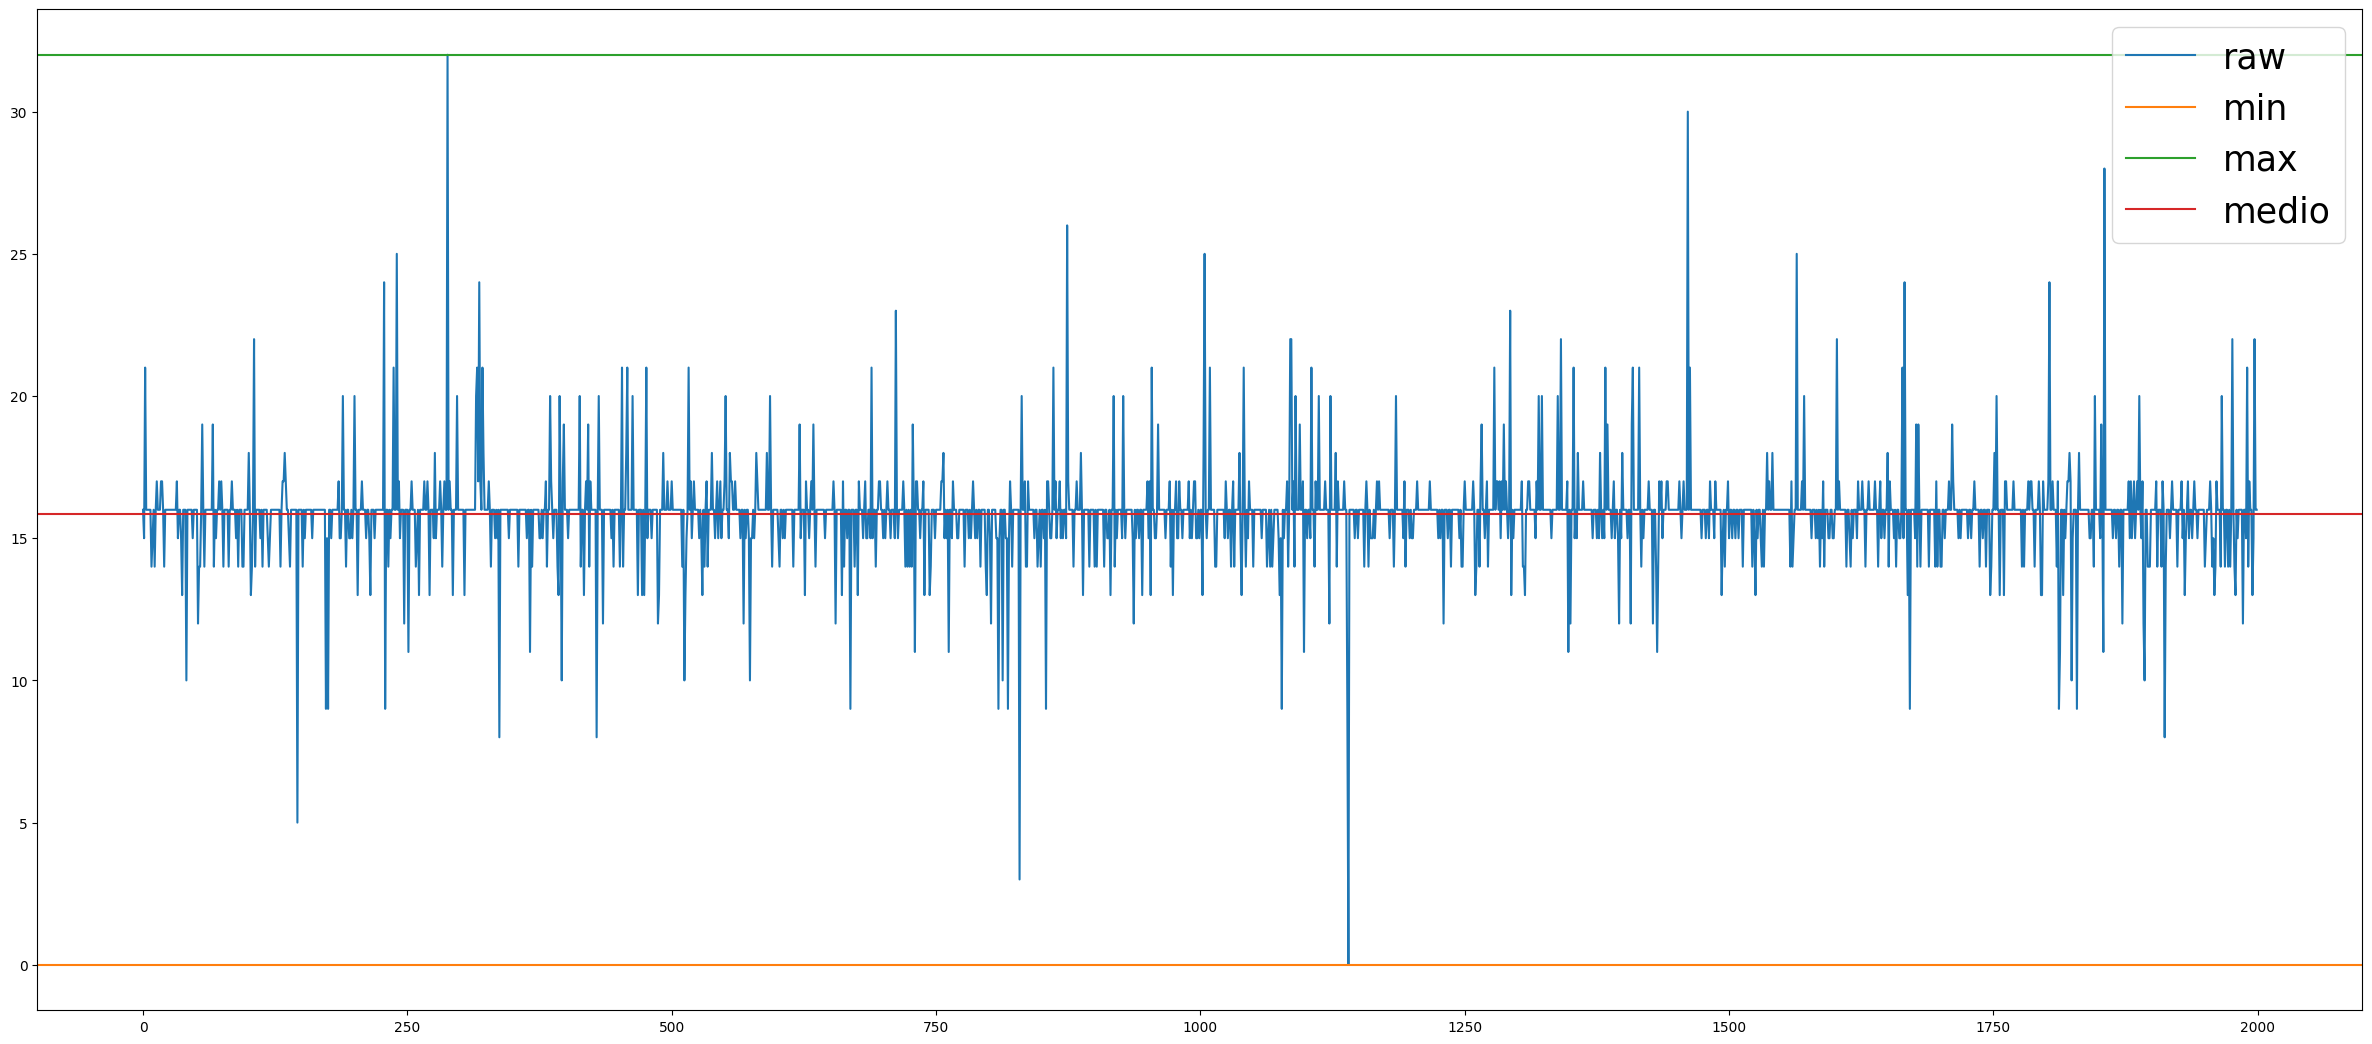

In [24]:
path_file_reference = '../../../results/TC-II-ADC/TC-II-ADC-REF.txt' 
reference = np.zeros( (2000,1)) 
voltage_ref = np.zeros((2000,1))
d0,d1,d2 = np.genfromtxt(path_file_reference, delimiter=',', dtype=None, encoding=None,unpack=True)
d1 =np.array([int(x, 16) for x in d1])
d2 =d2.astype(int) 
reference = d2  
min_ref = np.amin(reference) 
max_ref =  np.amax(reference)
mean_ref = np.mean(reference)
voltage_ref = reference*(SOURCE_ADC_VOLTAGE/MAX_VALUE)
figref, axref = plt.subplots(figsize=(30,13))
l1=axref.plot(n_samples_adc, reference,label='raw',color='#1f77b4')
l2=axref.axhline(y=min_ref,label='min',color= '#ff7f0e')
l3=axref.axhline(y=max_ref,label='max',color='#2ca02c')
l4=axref.axhline(y=mean_ref,label='medio',color ='#d62728')
axref.legend(fontsize=25)

# TC-ADC-III: Test de validación diferencia constante. 

(0.0, 4200.0)

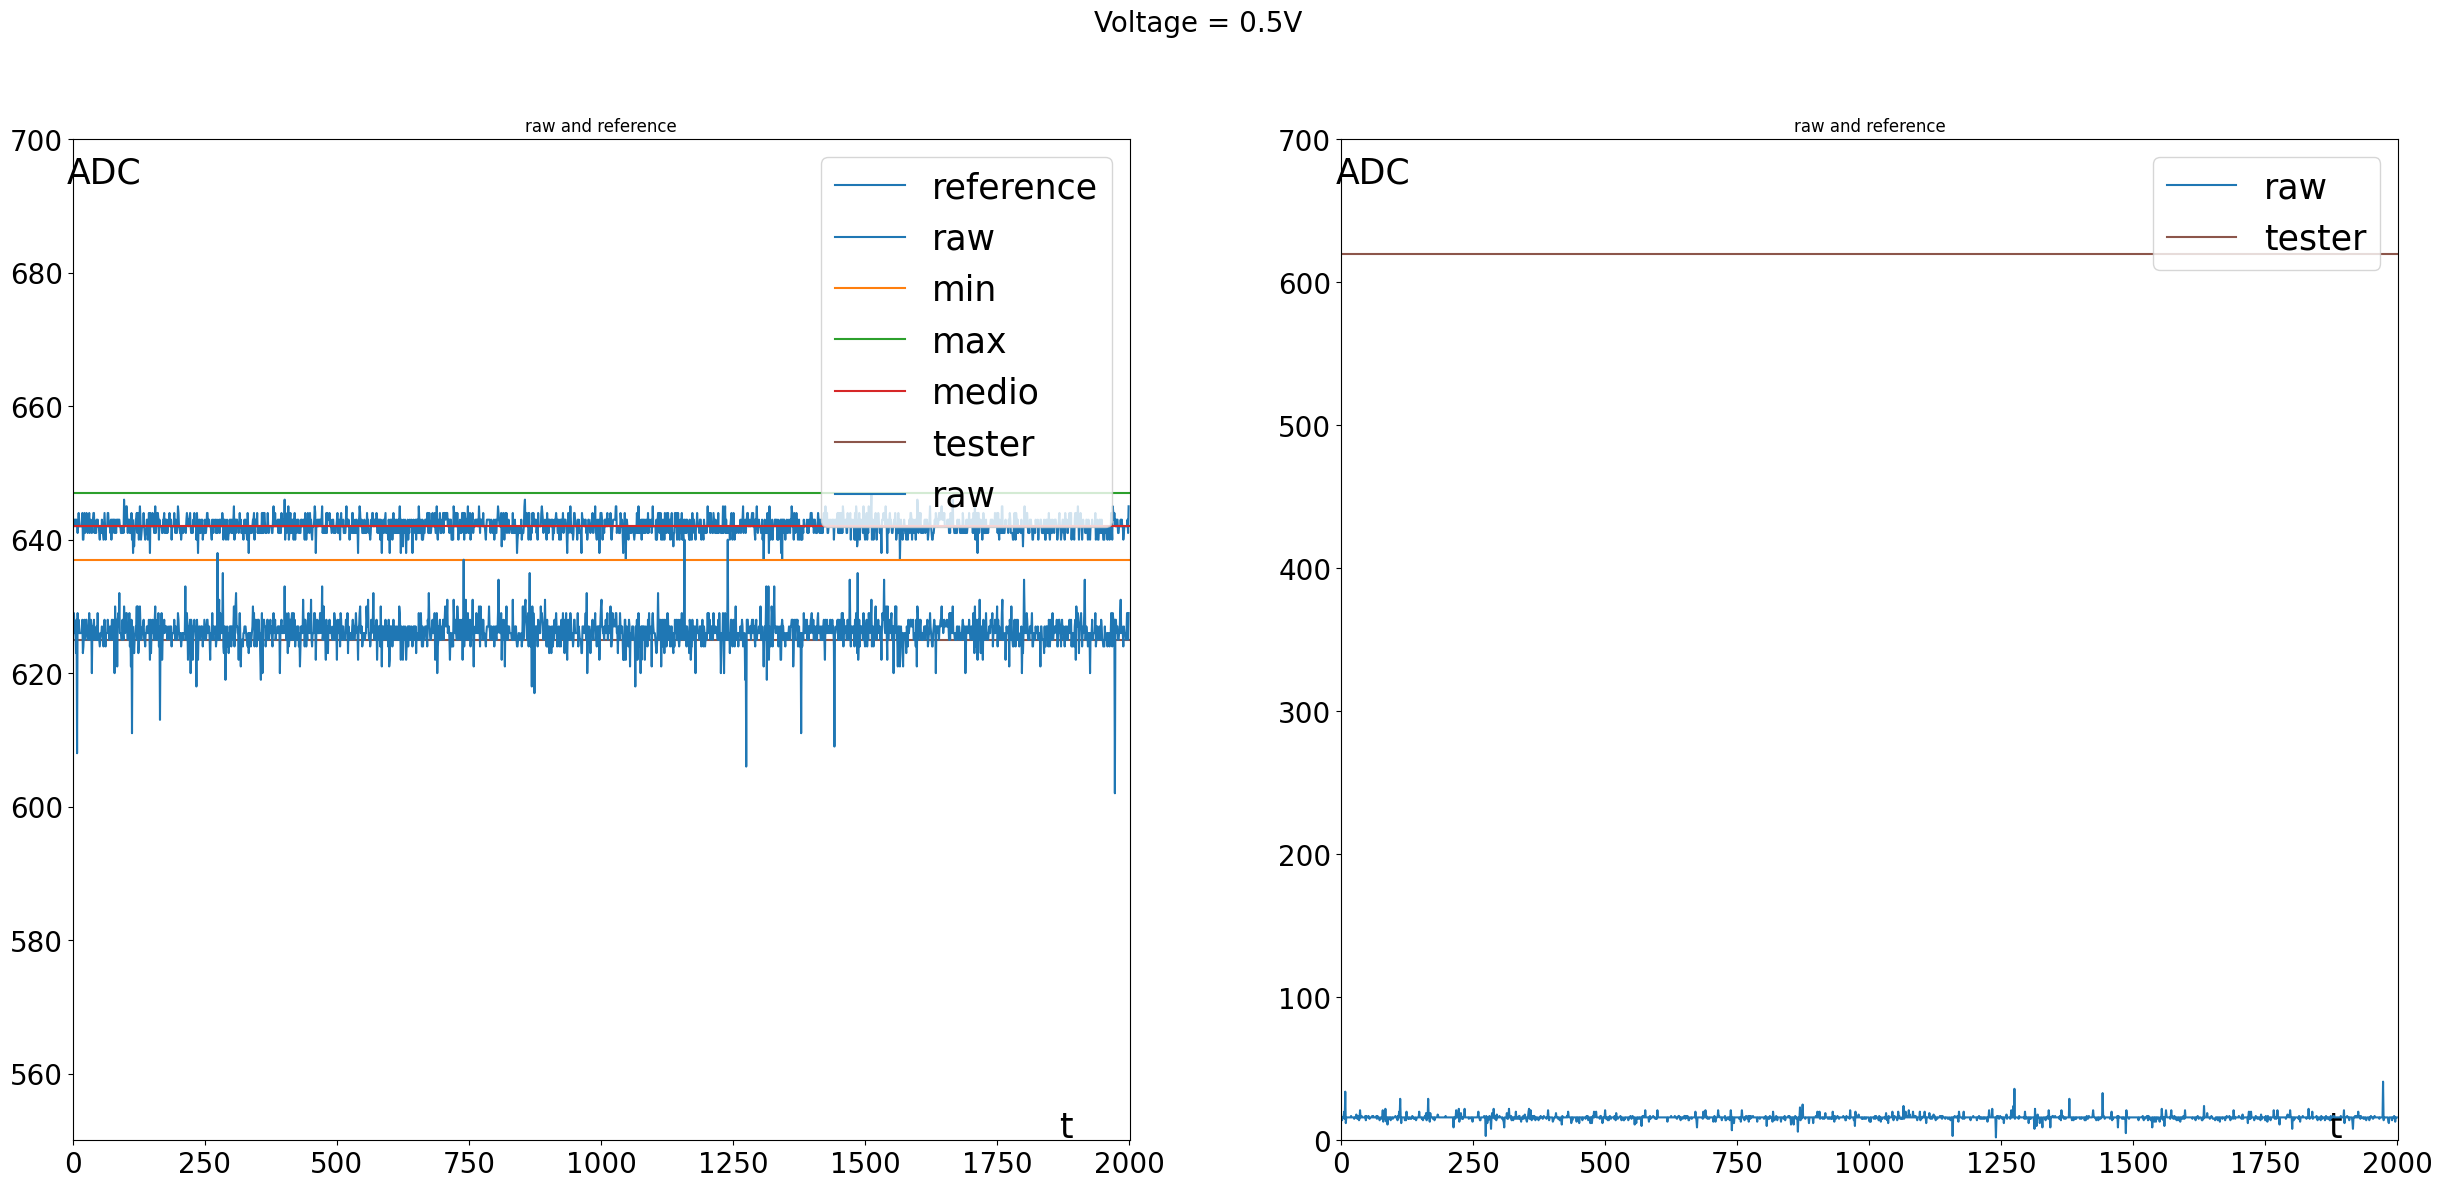

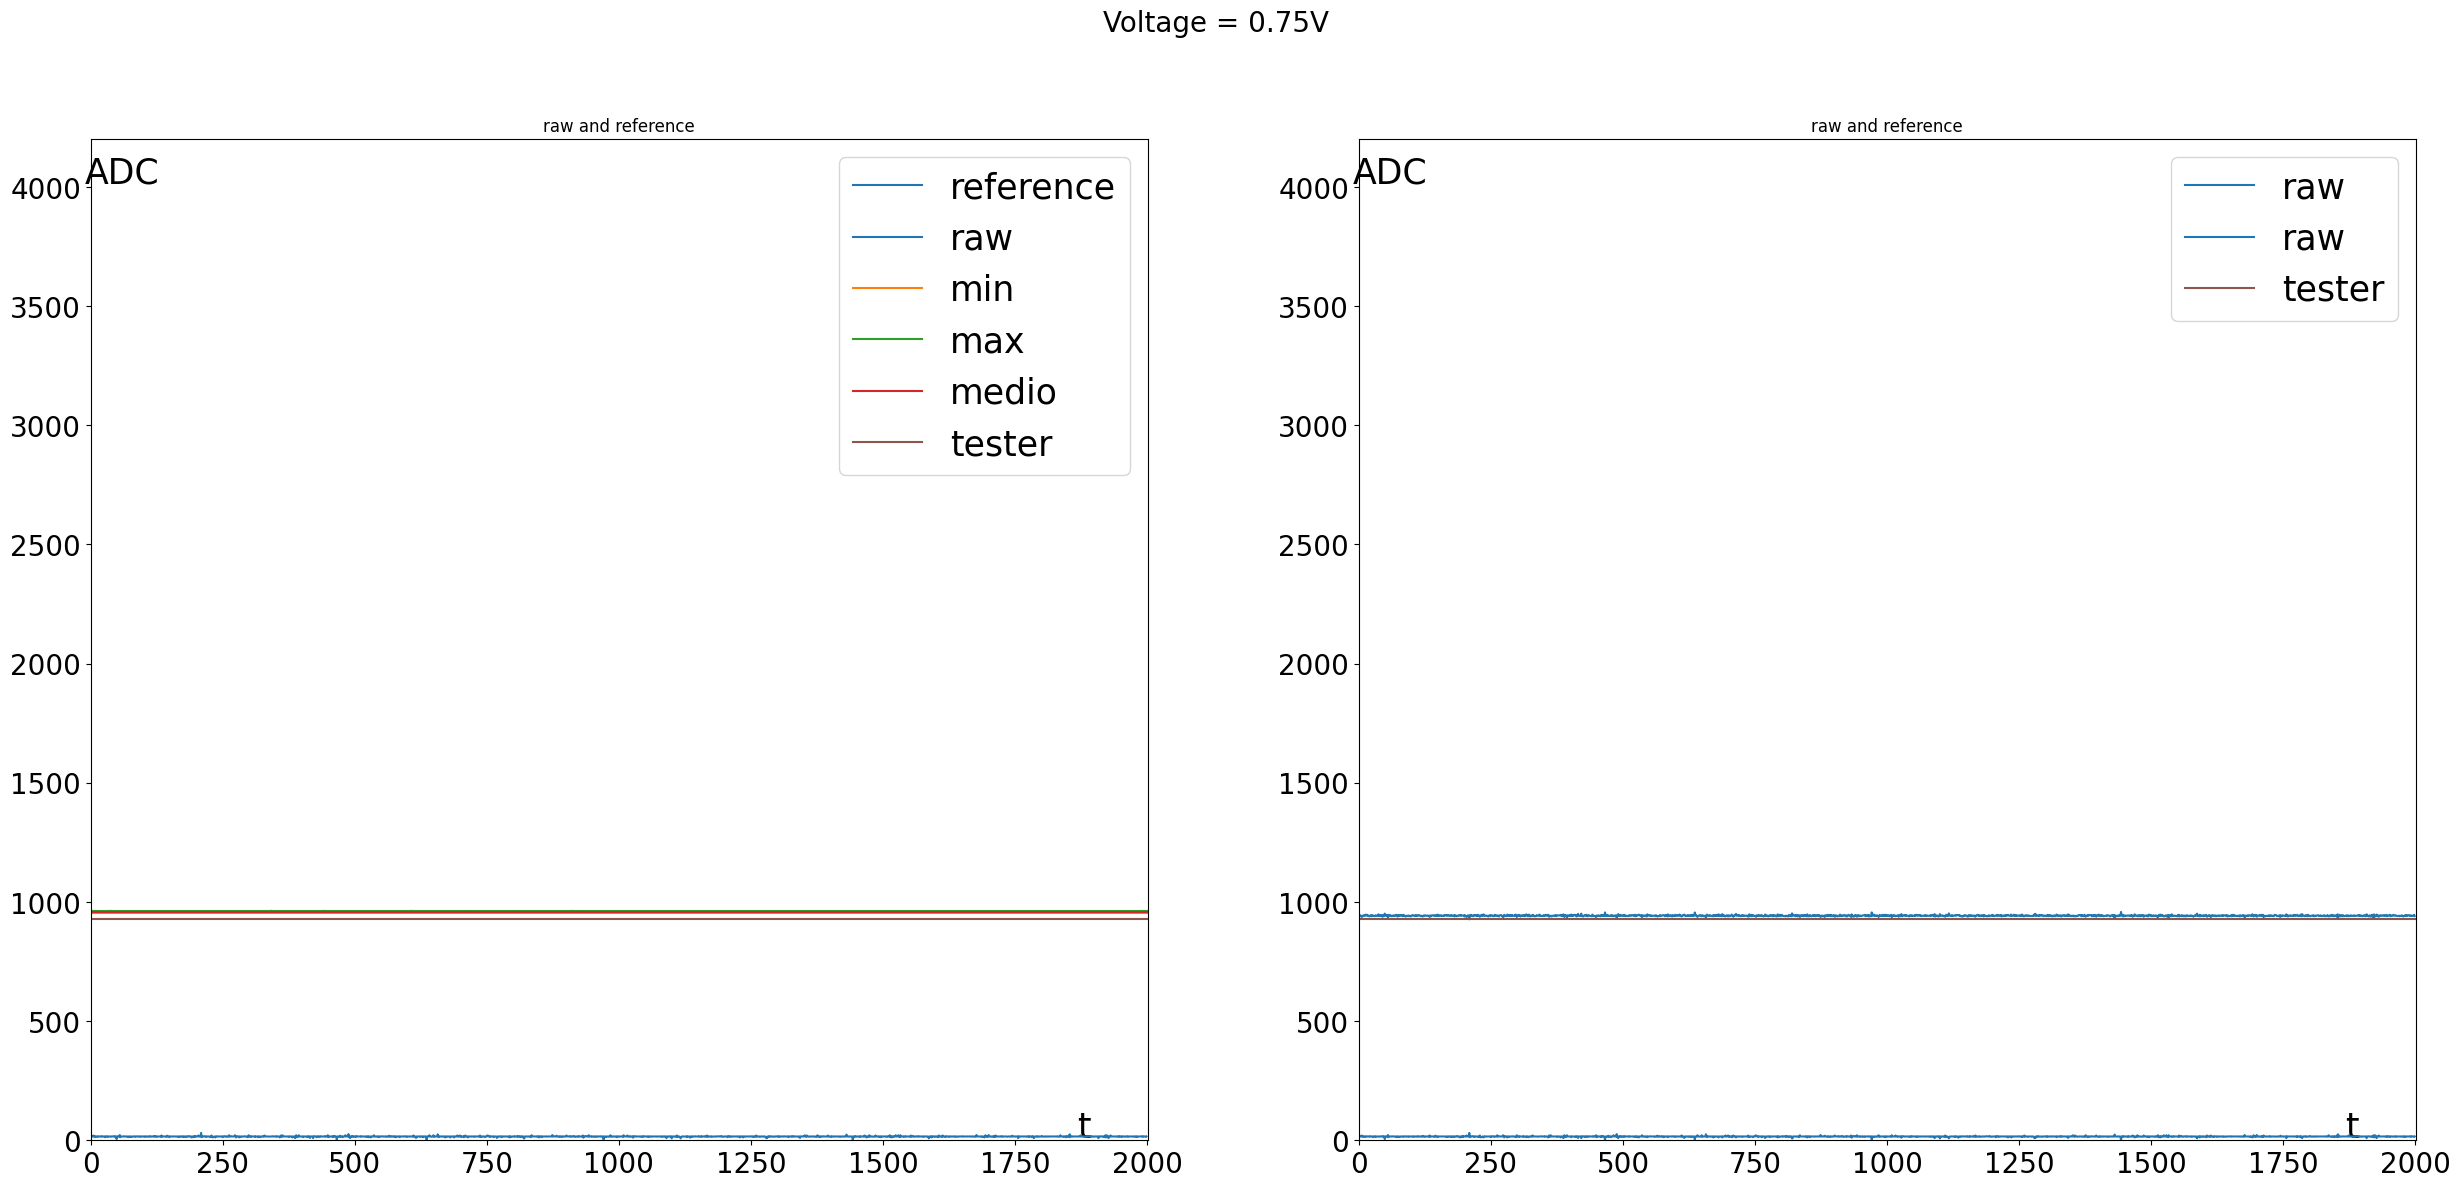

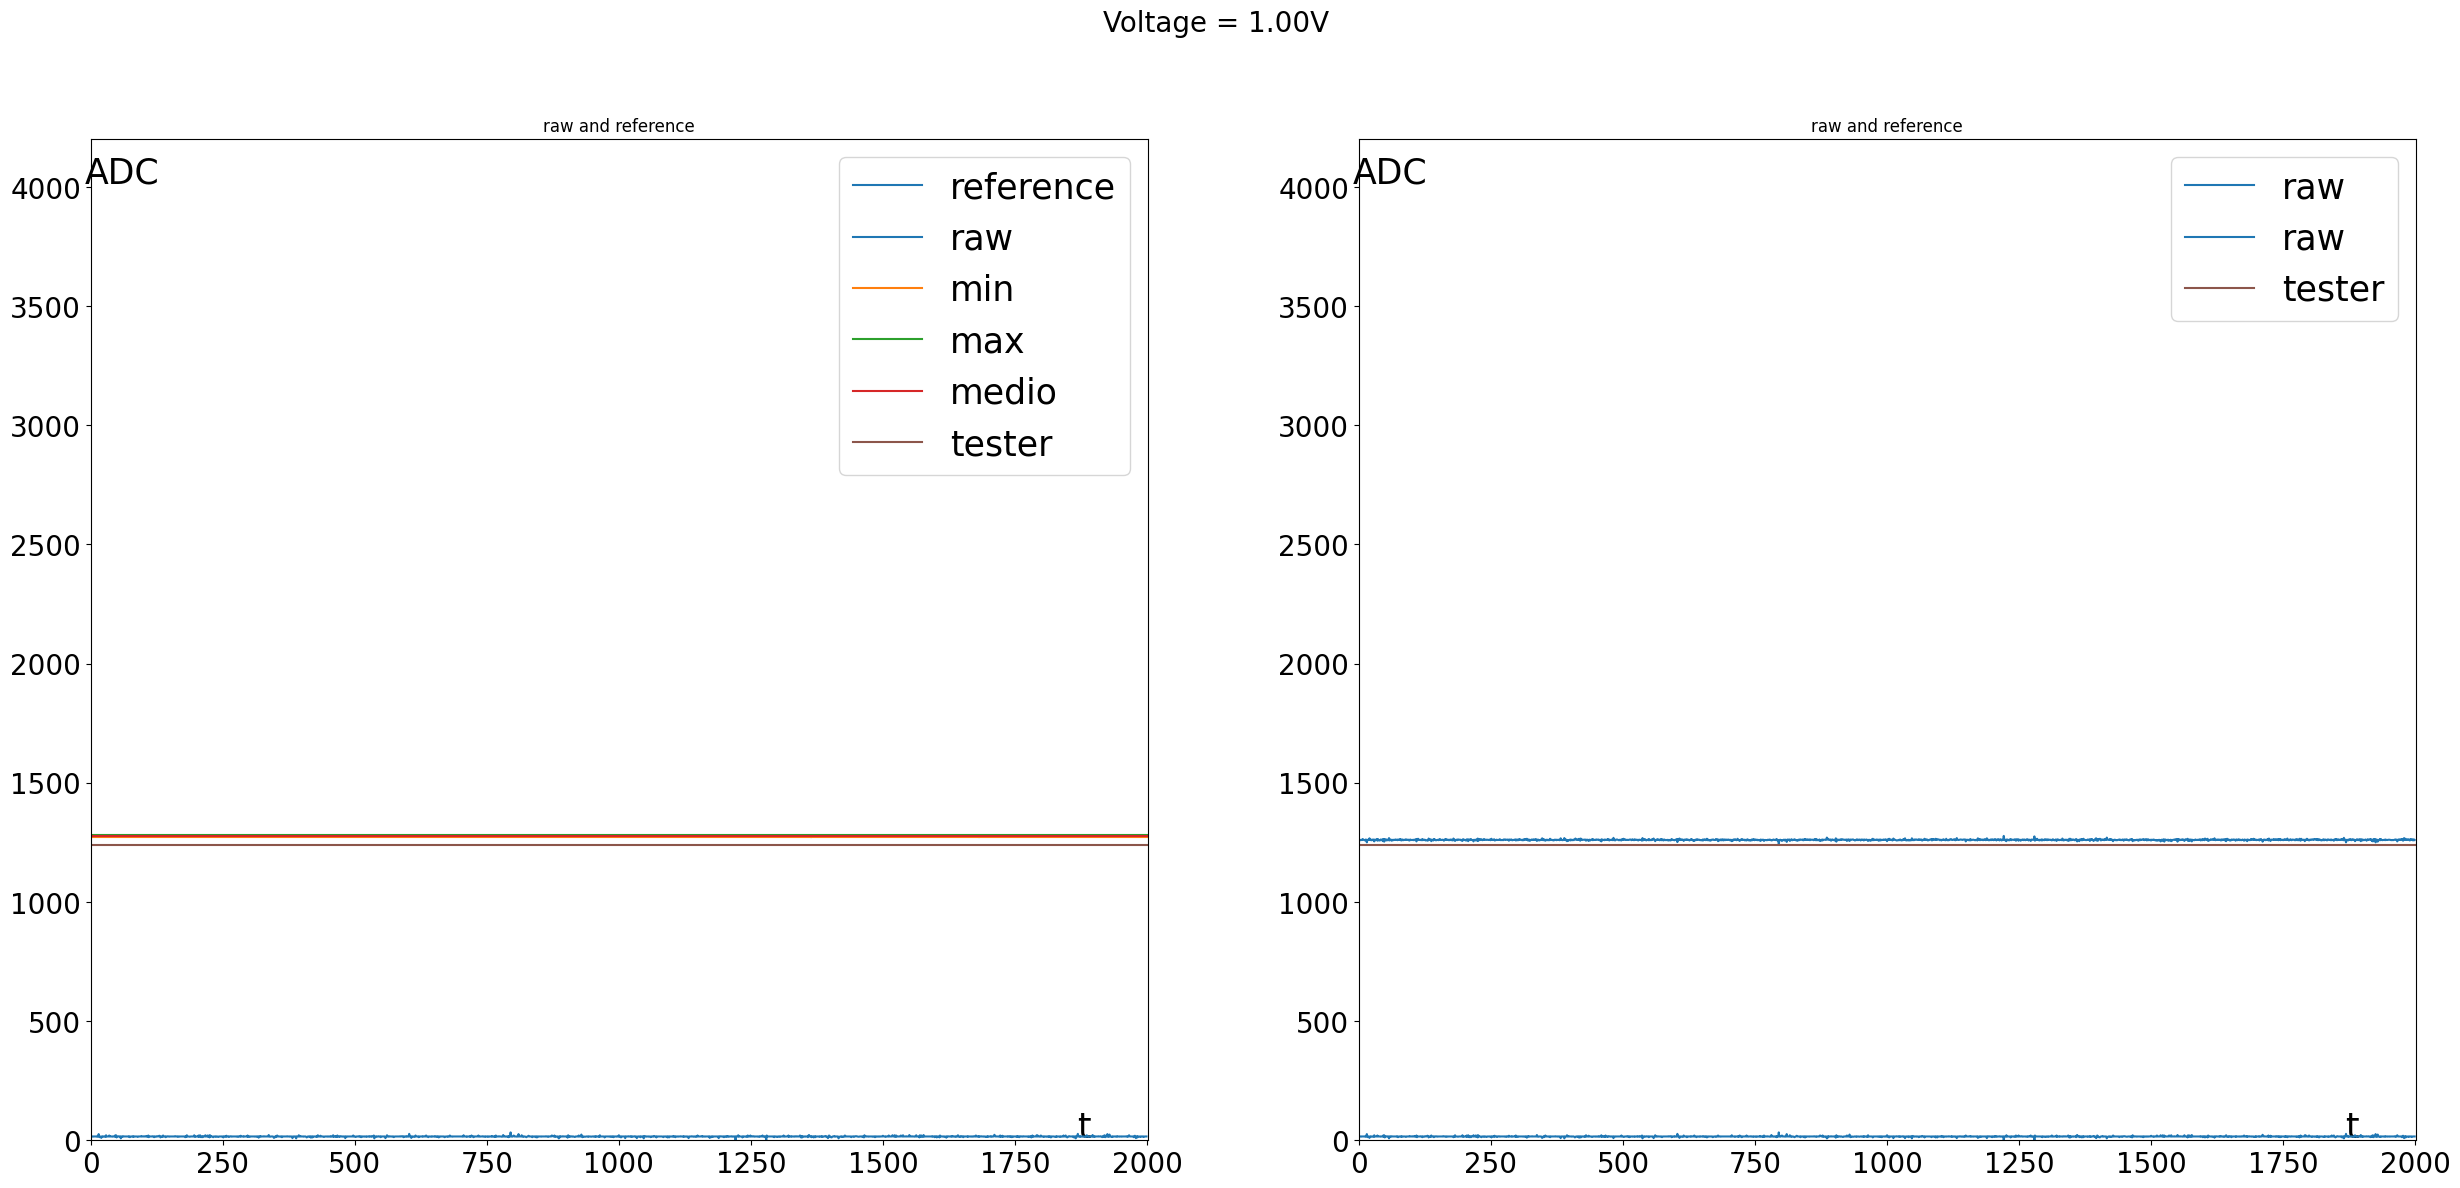

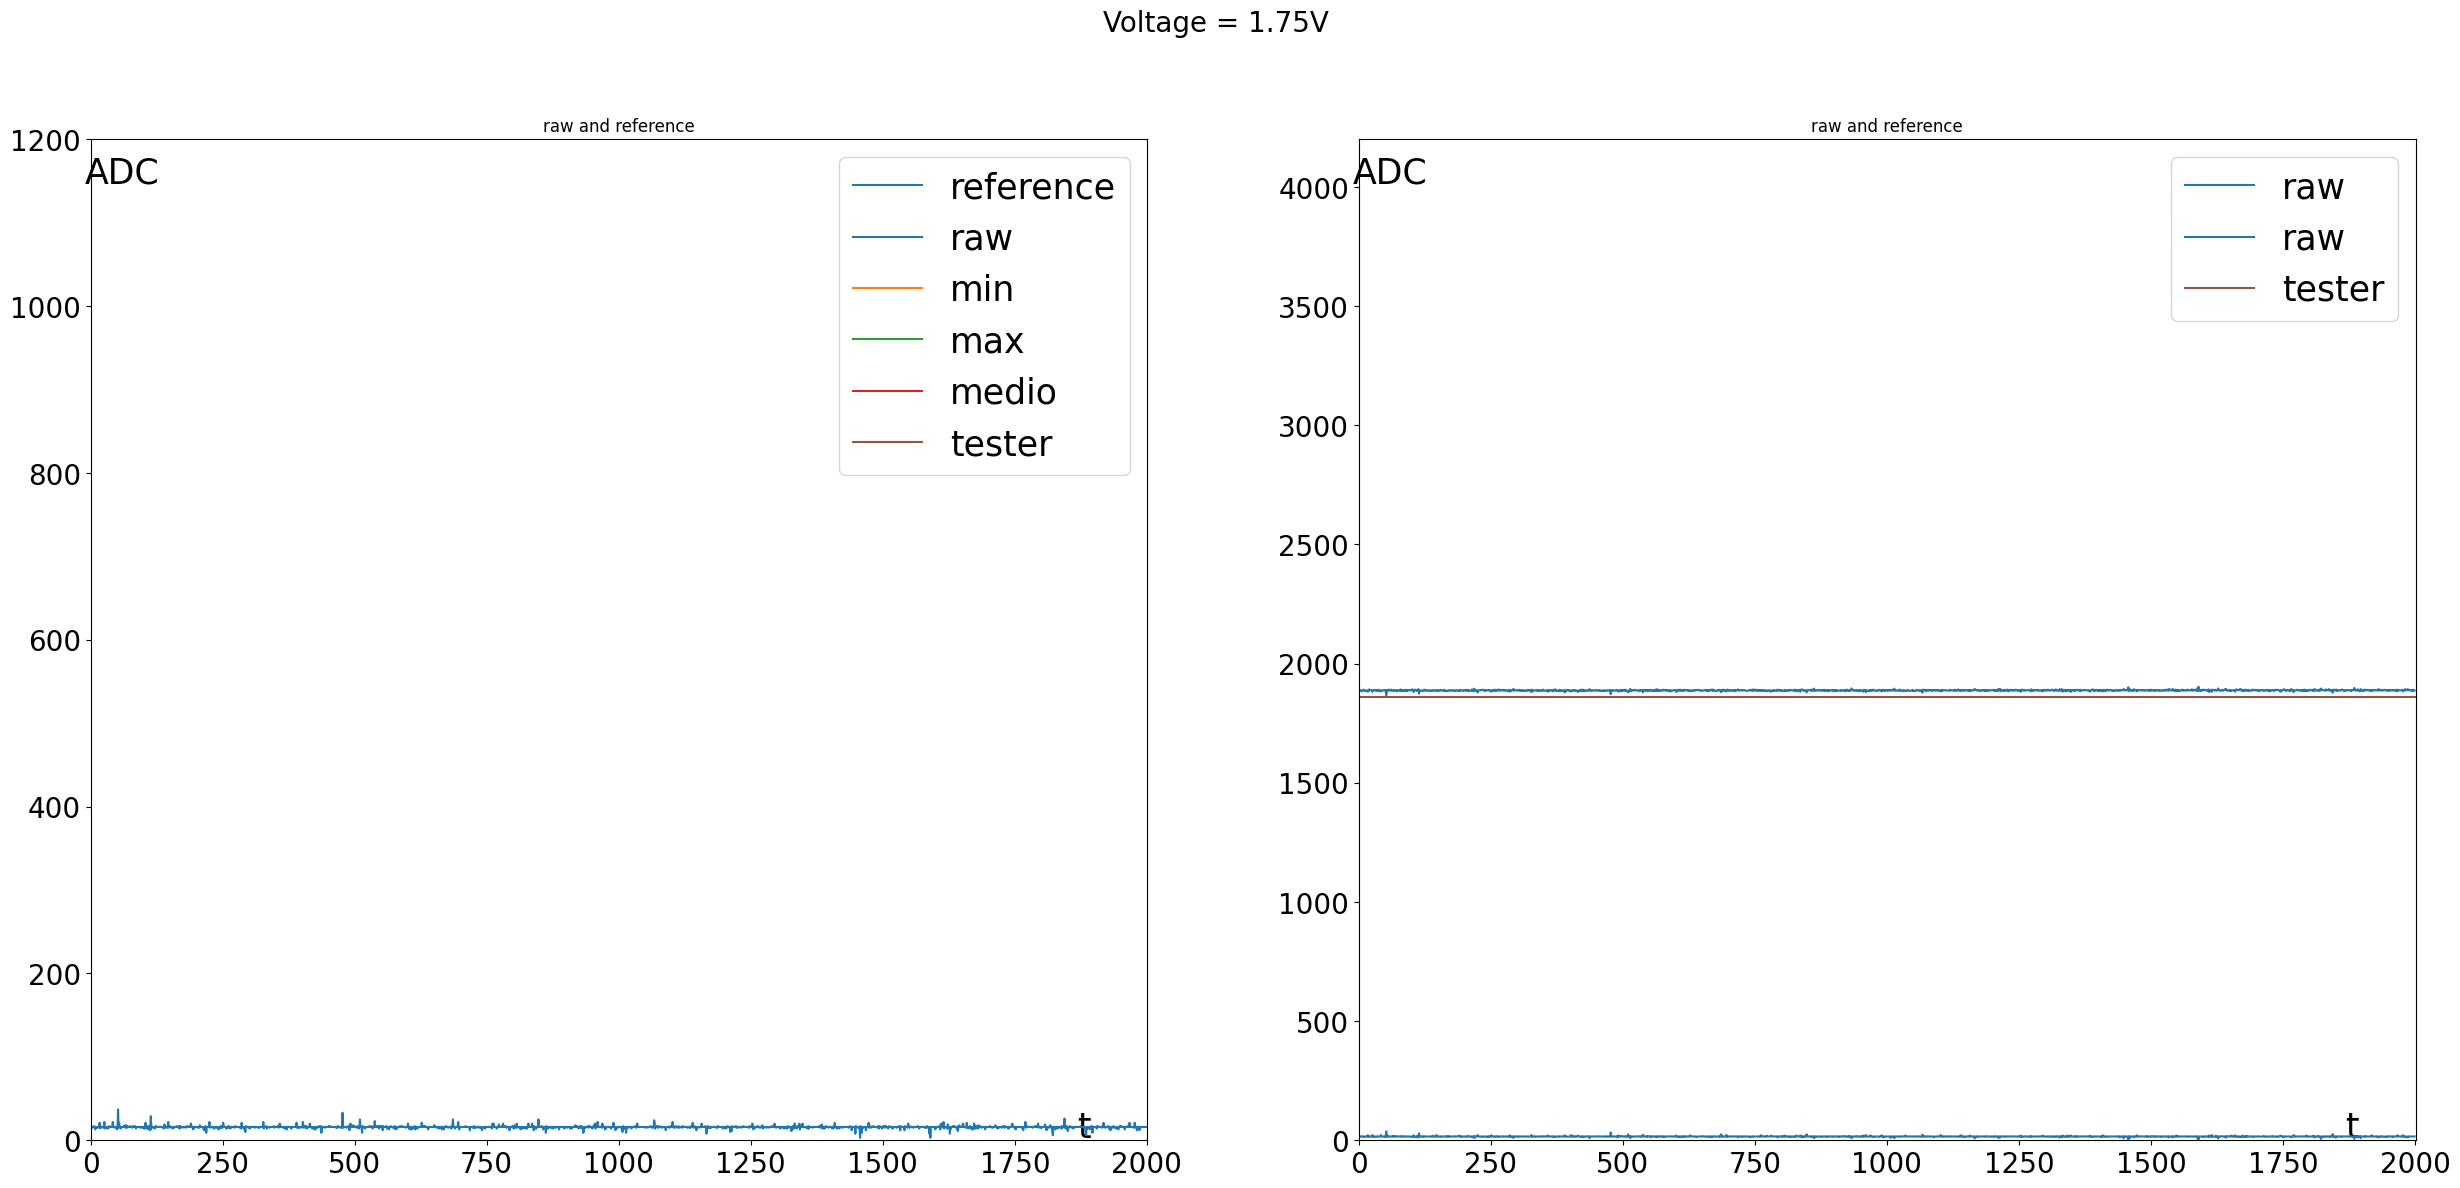

In [154]:
### 0.5v fuente - Tester 0.501v  
### 0.75 fuente - Tester 0.752v 
### 1.0  fuente - Tester 1.003v 
### 1.5  fuente - Tester 1.504v 
### 2.0  fuente - Tester 2.000v
### 2.75 fuente - Tester 2.750v
### 3.3. fuente - Tester 3.300v

path_file = '../../../results/TC-III-ADC/'
list_files_tcIII = ['TC-III-ADC-0.50.txt',
                    'TC-III-ADC-0.75.txt',
                    'TC-III-ADC-1.00.txt',
                    'TC-III-ADC-1.50.txt',
                    'TC-III-ADC-2.00.txt',
                    'TC-III-ADC-2.75.txt',
                    'TC-III-ADC-3.30.txt']

voltage_source = [0.5,0.75,1.0,1.5,2.0,2.75,3.3]
adc_voltage_source_expected = [] 
for l in voltage_source: 
    adc_voltage_source_expected.append(int((4096/3.3)*l)) ## expected raw 


## file commas separate values: index, hex-difference, dec-difference, hex-reference,dec-reference, hex-rawdata, dec-rawdata

n_samples_adc          = np.arange(0,2000,1.0,dtype=float) # eje x para gráficas ADC 
difference_data        = np.zeros((2000,len(list_files_tcIII)),dtype=int)
difference_data_hex    = np.zeros((2000,len(list_files_tcIII)),dtype=int)
raw_reference_data     = np.zeros((2000,len(list_files_tcIII)),dtype=int)
raw_reference_data_hex = np.zeros((2000,len(list_files_tcIII)),dtype=int)
raw_adc_data           = np.zeros((2000,len(list_files_tcIII)),dtype=int)
raw_adc_data_hex       = np.zeros((2000,len(list_files_tcIII)),dtype=int)

voltage_diff= np.zeros((2000,len(list_files_tcIII))) 
voltage_raw= np.zeros((2000,len(list_files_tcIII))) 
voltage_reference= np.zeros((2000,len(list_files_tcIII))) 





ADC_mean_dif = []
ADC_max_dif  = []
ADC_min_dif  = [] 
ADC_mean_ref = []
ADC_max_ref  = []
ADC_min_ref  = [] 
ADC_mean_raw = []
ADC_max_raw  = []
ADC_min_raw  = [] 


### PROCESSING FILES FOR EXTRACT DATA !     
i = 0 
### d0: index, d1: hex-dif 
for file in list_files_tcIII:    
    index,hex_diff,dec_diff,hex_ref,dec_ref,hex_raw_adc,dec_raw_adc = np.genfromtxt(path_file+file, delimiter=',', dtype=None, encoding=None,unpack=True)
    hex_diff=np.array([int(x, 16) for x in hex_diff])
    dec_diff =dec_diff.astype(int) 
    hex_ref = np.array([int(x, 16) for x in hex_ref])
    dec_ref = dec_ref.astype(int)
    hex_raw_adc = np.array([int(x, 16) for x in hex_raw_adc])
    dec_raw_adc = dec_raw_adc.astype(int)      
    ## load values in a column of vector 
    difference_data[:,i] = dec_diff 
    difference_data_hex[:,i] = dec_diff     
    ADC_mean_dif.append(np.mean(dec_diff))
    ADC_max_dif.append(np.amax(dec_diff))
    ADC_min_dif.append(np.amin(dec_diff))
    raw_reference_data[:,i]  = dec_ref
    raw_reference_data_hex[:,i] = hex_ref
    ADC_mean_ref.append(np.mean(dec_ref))
    ADC_max_ref.append(np.amax(dec_ref))
    ADC_min_ref.append(np.amin(dec_ref))
    raw_adc_data_hex[:,i] = hex_raw_adc
    raw_adc_data[:,i] = dec_raw_adc 
    ADC_mean_raw.append(np.mean(dec_raw_adc))
    ADC_max_raw.append(np.amax(dec_raw_adc))
    ADC_min_raw.append(np.amin(dec_raw_adc))
    i = i + 1 

### plotting figures ! 
############################### VOLTAGE 0.5V ###############################################################################

index = 0 ## 0.5v 
ax_index = [0,1] 
figDiff05,axdiff05 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
figDiff05.suptitle('Voltage = 0.5V',fontsize = 20) 

l0 = axdiff05[ax_index[0]].plot(n_samples_adc, raw_reference_data[:,index],label='reference',color='#1f77b4')
l1 = axdiff05[ax_index[0]].plot(n_samples_adc, raw_adc_data[:,index],label='raw',color='#1f77b4')
l2 = axdiff05[ax_index[0]].axhline(y=ADC_min_raw[index],label='min',color= '#ff7f0e')
l3 = axdiff05[ax_index[0]].axhline(y=ADC_max_raw[index],label='max',color='#2ca02c')
l4 = axdiff05[ax_index[0]].axhline(y=ADC_mean_raw[index],label='medio',color ='#d62728')
l6 = axdiff05[ax_index[0]].axhline(y=adc_voltage_source_expected[index],label='tester',color= '#8c564b')
l7 = axdiff05[ax_index[0]].plot(n_samples_adc, difference_data[:,index],label='raw',color='#1f77b4')
l1 = axdiff05[ax_index[1]].plot(n_samples_adc, raw_reference_data[:,index],label='raw',color='#1f77b4')
l2 = axdiff05[ax_index[1]].axhline(y=adc_voltage_source_expected[index],label='tester',color= '#8c564b')
#CONFIGURE PLOT 
axdiff05[ax_index[0]].set_title('raw and reference') 
axdiff05[ax_index[0]].legend(loc='upper right',fontsize=25)
axdiff05[ax_index[0]].set_xlabel('t',fontsize = 25) 
axdiff05[ax_index[0]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff05[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axdiff05[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axdiff05[ax_index[0]].yaxis.set_label_coords(0.03,0.95)
axdiff05[ax_index[0]].set_xlim([0,2001]) 
axdiff05[ax_index[0]].set_ylim([550,700]) 

axdiff05[ax_index[1]].set_title('raw and reference') 
axdiff05[ax_index[1]].legend(loc='upper right',fontsize=25)
axdiff05[ax_index[1]].set_xlabel('t',fontsize = 25) 
axdiff05[ax_index[1]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff05[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axdiff05[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axdiff05[ax_index[1]].yaxis.set_label_coords(0.03,0.95)
axdiff05[ax_index[1]].set_xlim([0,2001]) 
axdiff05[ax_index[1]].set_ylim([0,700]) 
############################### END OF VOLTAGE 0.5V ###############################################################################



############################### VOLTAGE 0.75V ###############################################################################

index = 1 ## 0.5v 
ax_index = [0,1] 
figDiff05,axdiff05 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
figDiff05.suptitle('Voltage = 0.75V',fontsize = 20) 

l0 = axdiff05[ax_index[0]].plot(n_samples_adc, raw_reference_data[:,index],label='reference',color='#1f77b4')
l1 = axdiff05[ax_index[0]].plot(n_samples_adc, raw_adc_data[:,index],label='raw',color='#1f77b4')
l2 = axdiff05[ax_index[0]].axhline(y=ADC_min_raw[index],label='min',color= '#ff7f0e')
l3 = axdiff05[ax_index[0]].axhline(y=ADC_max_raw[index],label='max',color='#2ca02c')
l4 = axdiff05[ax_index[0]].axhline(y=ADC_mean_raw[index],label='medio',color ='#d62728')
l6 = axdiff05[ax_index[0]].axhline(y=adc_voltage_source_expected[index],label='tester',color= '#8c564b')
l0 = axdiff05[ax_index[1]].plot(n_samples_adc, difference_data[:,index],label='raw',color='#1f77b4')
l1 = axdiff05[ax_index[1]].plot(n_samples_adc, raw_reference_data[:,index],label='raw',color='#1f77b4')
l2 = axdiff05[ax_index[1]].axhline(y=adc_voltage_source_expected[index],label='tester',color= '#8c564b')
#CONFIGURE PLOT 
axdiff05[ax_index[0]].set_title('raw and reference') 
axdiff05[ax_index[0]].legend(loc='upper right',fontsize=25)
axdiff05[ax_index[0]].set_xlabel('t',fontsize = 25) 
axdiff05[ax_index[0]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff05[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axdiff05[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axdiff05[ax_index[0]].yaxis.set_label_coords(0.03,0.95)
axdiff05[ax_index[0]].set_xlim([0,2001]) 
axdiff05[ax_index[0]].set_ylim([0,4200]) 

axdiff05[ax_index[1]].set_title('raw and reference') 
axdiff05[ax_index[1]].legend(loc='upper right',fontsize=25)
axdiff05[ax_index[1]].set_xlabel('t',fontsize = 25) 
axdiff05[ax_index[1]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff05[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axdiff05[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axdiff05[ax_index[1]].yaxis.set_label_coords(0.03,0.95)
axdiff05[ax_index[1]].set_xlim([0,2001]) 
axdiff05[ax_index[1]].set_ylim([0,4200]) 
############################### END OF VOLTAGE 0.75V ###############################################################################




############################### VOLTAGE 1.00V ###############################################################################

index = 2 ## 0.5v 
ax_index = [0,1] 
figDiff05,axdiff05 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
figDiff05.suptitle('Voltage = 1.00V',fontsize = 20) 

l0 = axdiff05[ax_index[0]].plot(n_samples_adc, raw_reference_data[:,index],label='reference',color='#1f77b4')
l1 = axdiff05[ax_index[0]].plot(n_samples_adc, raw_adc_data[:,index],label='raw',color='#1f77b4')
l2 = axdiff05[ax_index[0]].axhline(y=ADC_min_raw[index],label='min',color= '#ff7f0e')
l3 = axdiff05[ax_index[0]].axhline(y=ADC_max_raw[index],label='max',color='#2ca02c')
l4 = axdiff05[ax_index[0]].axhline(y=ADC_mean_raw[index],label='medio',color ='#d62728')
l6 = axdiff05[ax_index[0]].axhline(y=adc_voltage_source_expected[index],label='tester',color= '#8c564b')
l0 = axdiff05[ax_index[1]].plot(n_samples_adc, difference_data[:,index],label='raw',color='#1f77b4')
l1 = axdiff05[ax_index[1]].plot(n_samples_adc, raw_reference_data[:,index],label='raw',color='#1f77b4')
l2 = axdiff05[ax_index[1]].axhline(y=adc_voltage_source_expected[index],label='tester',color= '#8c564b')
#CONFIGURE PLOT 
axdiff05[ax_index[0]].set_title('raw and reference') 
axdiff05[ax_index[0]].legend(loc='upper right',fontsize=25)
axdiff05[ax_index[0]].set_xlabel('t',fontsize = 25) 
axdiff05[ax_index[0]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff05[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axdiff05[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axdiff05[ax_index[0]].yaxis.set_label_coords(0.03,0.95)
axdiff05[ax_index[0]].set_xlim([0,2001]) 
axdiff05[ax_index[0]].set_ylim([0,4200]) 

axdiff05[ax_index[1]].set_title('raw and reference') 
axdiff05[ax_index[1]].legend(loc='upper right',fontsize=25)
axdiff05[ax_index[1]].set_xlabel('t',fontsize = 25) 
axdiff05[ax_index[1]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff05[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axdiff05[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axdiff05[ax_index[1]].yaxis.set_label_coords(0.03,0.95)
axdiff05[ax_index[1]].set_xlim([0,2001]) 
axdiff05[ax_index[1]].set_ylim([0,4200]) 
############################### END OF VOLTAGE 1.00V ###############################################################################



############################### VOLTAGE 1.70V ###############################################################################

index = 3 ## 0.5v 
ax_index = [0,1] 
figDiff05,axdiff05 = plt.subplots(nrows=1, ncols=2,figsize=(30,13))
figDiff05.suptitle('Voltage = 1.75V',fontsize = 20) 

l0 = axdiff05[ax_index[0]].plot(n_samples_adc, raw_reference_data[:,index],label='reference',color='#1f77b4')
l1 = axdiff05[ax_index[0]].plot(n_samples_adc, raw_adc_data[:,index],label='raw',color='#1f77b4')
l2 = axdiff05[ax_index[0]].axhline(y=ADC_min_raw[index],label='min',color= '#ff7f0e')
l3 = axdiff05[ax_index[0]].axhline(y=ADC_max_raw[index],label='max',color='#2ca02c')
l4 = axdiff05[ax_index[0]].axhline(y=ADC_mean_raw[index],label='medio',color ='#d62728')
l6 = axdiff05[ax_index[0]].axhline(y=adc_voltage_source_expected[index],label='tester',color= '#8c564b')
l0 = axdiff05[ax_index[1]].plot(n_samples_adc, difference_data[:,index],label='raw',color='#1f77b4')
l1 = axdiff05[ax_index[1]].plot(n_samples_adc, raw_reference_data[:,index],label='raw',color='#1f77b4')
l2 = axdiff05[ax_index[1]].axhline(y=adc_voltage_source_expected[index],label='tester',color= '#8c564b')
#CONFIGURE PLOT 
axdiff05[ax_index[0]].set_title('raw and reference') 
axdiff05[ax_index[0]].legend(loc='upper right',fontsize=25)
axdiff05[ax_index[0]].set_xlabel('t',fontsize = 25) 
axdiff05[ax_index[0]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff05[ax_index[0]].tick_params(axis='both', which='major', labelsize=20)
axdiff05[ax_index[0]].xaxis.set_label_coords(0.94,0.03)
axdiff05[ax_index[0]].yaxis.set_label_coords(0.03,0.95)
axdiff05[ax_index[0]].set_xlim([0,2001]) 
axdiff05[ax_index[0]].set_ylim([0,1200]) 

axdiff05[ax_index[1]].set_title('raw and reference') 
axdiff05[ax_index[1]].legend(loc='upper right',fontsize=25)
axdiff05[ax_index[1]].set_xlabel('t',fontsize = 25) 
axdiff05[ax_index[1]].set_ylabel('ADC', rotation = 0,fontsize =25) 
axdiff05[ax_index[1]].tick_params(axis='both', which='major', labelsize=20)
axdiff05[ax_index[1]].xaxis.set_label_coords(0.94,0.03)
axdiff05[ax_index[1]].yaxis.set_label_coords(0.03,0.95)
axdiff05[ax_index[1]].set_xlim([0,2001]) 
axdiff05[ax_index[1]].set_ylim([0,4200]) 
############################### END OF VOLTAGE 1.00V ###############################################################################





In [ ]:
## compare TC-I AND TC-III 
## voltage of tcI files and tciii 
## voltage_calc_tcI, voltage_calc_tcIII, voltage_refIII, voltageDiffiii (all cases) 
## plotting scattering 





In [ ]:
## GENERATE A REPORT TEST 
### generate a table report 




# TC-ADC-IV: Test de relación ángulo-tensión 

Text(0.5, 1.0, 'angulo horizontal')

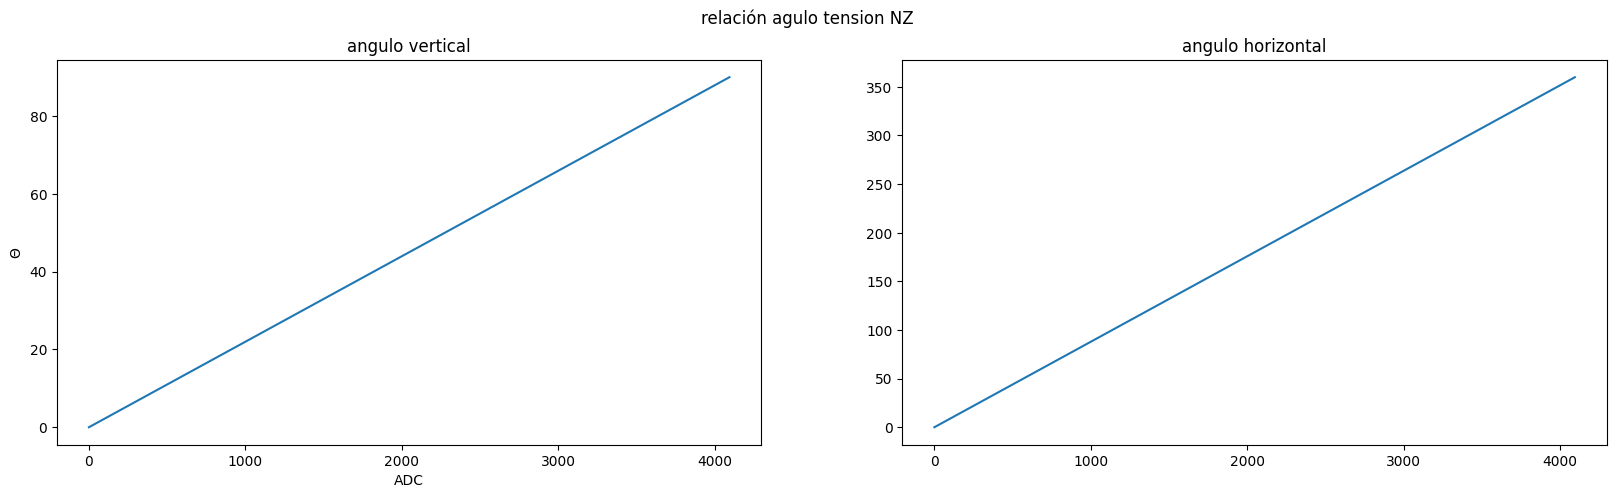

In [9]:
import numpy as np 
import matplotlib.pylab as plt
adc_teorical_values = np.arange(0,4096,1.0,dtype=float)  
angle_vertical = (90.0/4095)*(adc_teorical_values - 0)
angle_hor = (360.0/4096)*(adc_teorical_values - 0)



figTeorAng,axang = plt.subplots(nrows = 1 , ncols = 2, figsize = (20,5)) 
figTeorAng.suptitle('relación agulo tension NZ') 
axang[0].set_title('angulo vertical') 
axang[0].plot(adc_teorical_values,angle_vertical) 
axang[0].set_xlabel('ADC') 
axang[0].set_ylabel(r'$\Theta$',rotation=0,fontsize= 20) 

axang[1].plot(adc_teorical_values,angle_hor) 
axang[1].set_title('angulo horizontal')   




